# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах(м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

План работы:
- Обработка информации о данных:
    - Заполнение пропусков
    - Изменение типов данных
    - Анализ дубликатов
    - Обработка аномальных значений
    - Добавлние новых столбцов
    - Удаление строк
- Анализ данных
    - изучение и описание параметров
    - построение гистограмм
- Изучение зависимостей цены квартир от различных параметров
- Описание зависимости стоимости объектов от расстояния до центра города, изучение цен в различных городах.
- Вывод

## Загрузка данных

### Загрузка модулей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import random

### Настройки

In [2]:
RANDOM_STATE = 12345
state = np.random.RandomState(RANDOM_STATE)
# Цветовая палитра документа
cm = 'crest'
mec = 'gray'
alpha = 0.7
fontsize=14
figsize_base = 5

def new_color(x='r'):
    '''Цвет графиков, по умолчанию случайный из заданной цветовой палитры. Принимает в качестве аргумента число, \
    соответствующее цвету в палитре.'''
    if x == 'r':
        return list(sns.color_palette(cm, 20)[random.randint(0,19)])
    return list(sns.color_palette(cm, 20)[x])
# Размеры

def figsize(width = 1, height=1):
    '''Задание размеров окна отрисовки.'''
    return (width*figsize_base, height*figsize_base)

# Отрисовка 
def plot_set(ax,title='',xlabel='',ylabel='',fontsize=fontsize,xrot=True,figsize=figsize()):
    '''Функция для отрисовки дополнительных параметров графиков. Подписьи осей и названия, размер шрифта и размер окна, 
    включение сетки.'''
    plt.xticks(rotation=90*int(xrot), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title+'\n', fontsize=fontsize)
    plt.xlabel('\n'+xlabel, fontsize=fontsize)
    plt.ylabel(ylabel+'\n', fontsize=fontsize)
    plt.grid(True)
    None
    
def mean_percent(x):
    '''Функция для форматирования значений. Округление до сотых и знак процента.'''
    try:
        return "{0:.2%}".format(x)
    except:
        return x

### Загрузка данных

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Получим информацию о таблице

In [4]:
pd.set_option('display.max_columns', 50) 
data.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем на экран 25 первых строк

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.duplicated().sum()

0

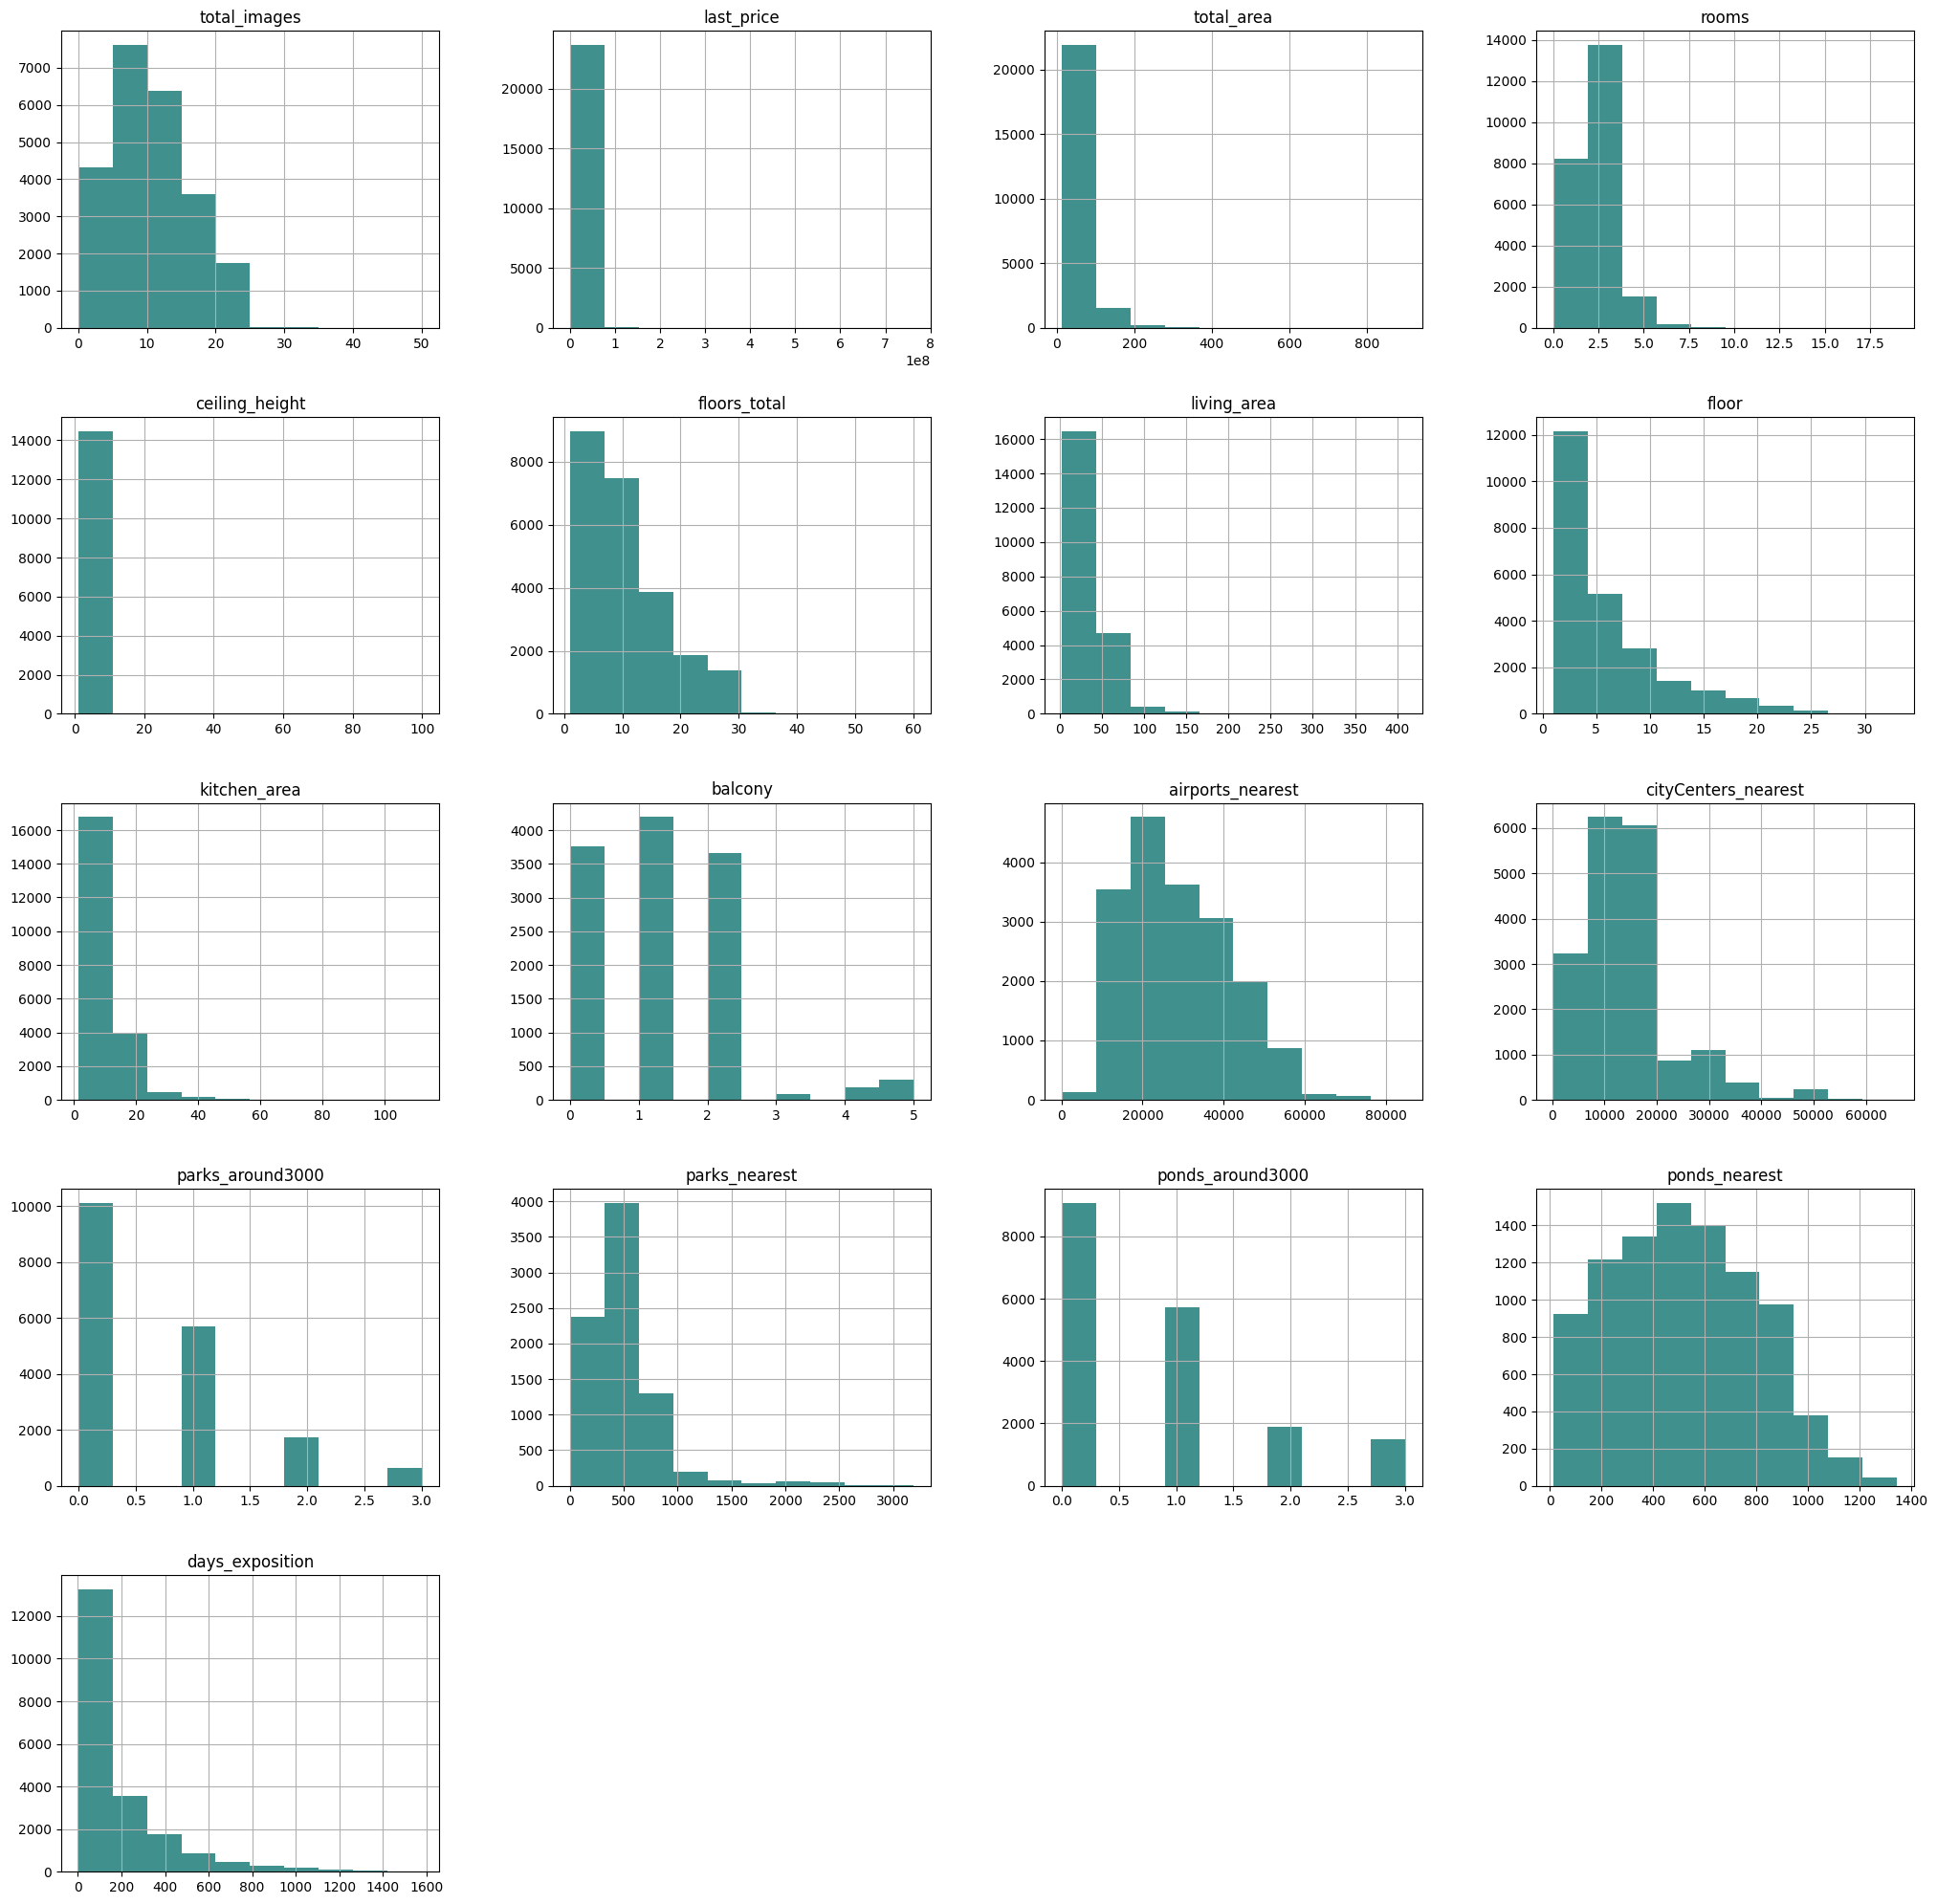

In [8]:
data.hist(figsize=figsize(5,5), color=new_color())
None

### Вывод этапа

Изучен датафрейм `insurance.csv`:
- 22 столбца:
    - `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
    - `balcony` - число балконов
    - `ceiling_height` - высота потолков (м)
    - `cityCenters_nearest` - расстояние до центра города (м)
    - `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)
    - `first_day_exposition` - дата публикации
    - `floor` - этаж
    - `floors_total` - всего этажей в доме
    - `is_apartment` - апартаменты (булев тип)
    - `kitchen_area` - площадь кухни в квадратных метрах (м$^2$)
    - `last_price` - цена на момент снятия с публикации
    - `living_area` - жилая площадь в квадратных метрах (м$^2$)
    - `locality_name` - название населённого пункта
    - `open_plan` - свободная планировка (булев тип)
    - `parks_around3000` - число парков в радиусе 3 км
    - `parks_nearest` - расстояние до ближайшего парка (м)
    - `ponds_around3000` - число водоёмов в радиусе 3 км
    - `ponds_nearest` - расстояние до ближайшего водоёма (м)
    - `rooms` - число комнат
    - `studio` - квартира-студия (булев тип)
    - `total_area` - общая площадь квартиры в квадратных метрах (м$^2$)
    - `total_images` - число фотографий квартиры в объявлении
- 23699 строк
- У некоторых признаков наблюдаются пропущенные значения.
- Явных дубликатов нет.

## Предобработка данных

### Удаление пропусков
Установим число пропусков в каждом столбце

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data.isna().mean().sort_values().apply(mean_percent)

total_images             0.00%
open_plan                0.00%
floor                    0.00%
rooms                    0.00%
studio                   0.00%
total_area               0.00%
last_price               0.00%
first_day_exposition     0.00%
locality_name            0.21%
floors_total             0.36%
living_area              8.03%
kitchen_area             9.61%
days_exposition         13.42%
ponds_around3000        23.28%
parks_around3000        23.28%
cityCenters_nearest     23.29%
airports_nearest        23.38%
ceiling_height          38.80%
balcony                 48.61%
ponds_nearest           61.56%
parks_nearest           65.91%
is_apartment            88.29%
dtype: object

Наибольший процент пропусков в столбцах `is_apartment`, `parks_nearest`, `ponds_nearest`. Существенный в `balcony` `ceiling_height`.

Обработаем пропуски. Проще всего сказать о столбцах `is_apartment` и `balcony`. Если информации `is_apartment`, значит объект скорее всего не является апартомкнтом: можно заменить на `False`. Если информации о балконах нет, скорее всего и балконов нет.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

Попробуем обработать столбец `ceiling_height`. 

In [12]:
data['ceiling_height'].value_counts()

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64

In [13]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение 1, максимальное 100. Нереалистичные данные. Но это скорее исключение, медиана и Q1 Q3 в порядке.
К сожалению, нет информации к какому типу дома принадлежит продаваемая недвижимость. Скорее всего у одного типа дома и высота потолков была бы одинаковая. Предположим, что дома одинаковой этажности могут иметь и похожие высоты потолков. Заменим пропуски `ceiling_height` медианными значениями групп с одинаковыми `floors_total`.

In [14]:
data.groupby('floors_total')['ceiling_height'].median()

floors_total
1.0      2.80
2.0      2.70
3.0      2.80
4.0      3.00
5.0      2.55
6.0      3.00
7.0      3.00
8.0      2.80
9.0      2.55
10.0     2.60
11.0     2.75
12.0     2.65
13.0     2.70
14.0     2.60
15.0     2.70
16.0     2.70
17.0     2.70
18.0     2.70
19.0     2.75
20.0     2.75
21.0     2.70
22.0     2.75
23.0     2.75
24.0     2.75
25.0     2.75
26.0     2.66
27.0     2.70
28.0     2.60
29.0     2.60
33.0      NaN
34.0     2.65
35.0     2.70
36.0    14.85
37.0     1.75
52.0     2.65
60.0     2.88
Name: ceiling_height, dtype: float64

Если выполнить данную замену вместо 9195 пропусков остаётся 78. Было 39% пропусков, осталось 0.3%. Смущает наличие неразумных значений. Поэтому выполним замену после обработки аномальных значений

Далее займёмся столбцом `living_area`. Логично допустить, что в квартирах с одинаковыми общими площадями и одинаковым числом комнат и жилая площадь примерно одинаковая. Маловероятно точное совпадение площади квартир. Округлим площади, разобьём на группы по 10 кв.м. То же проделаем и для площади кухни

In [15]:
for r in data['rooms'].unique():
    for t in (data['total_area'] // 10 * 10).unique():
        if ~data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10), 'living_area'].isna().all():
            data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10) & (data['living_area'].isna()), 'living_area'] = \
            data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10), 'living_area'].median()
        if ~data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10), 'kitchen_area'].isna().all():
            data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
            data.loc[(data['rooms'] == r) & (data['total_area'] > t) & (data['total_area'] <= t + 10), 'kitchen_area'].median()

Число пустых ячеек в столбце `living_area` уменьшилось с 1903 до 14. С 8% до 0.05%.
Число пустых ячеек в столбце `kitchen_area` уменьшилось с 2278 до 212. С 10% до 0.9%.
Эти значения зависят от размера группы разбиений по площади. В данном случае по 10 кв.м.При меньшем шаге остаётся много пропусков, а больший шаг приводит к потере точности и общности.

Если нет информации о парках и водоёмах рядом, скорее всего их нет, заменим на 0

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                14
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              212
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проанализируем столбец `cityCenters_nearest`. Санкт-Петербург большой город, посмотрим какому количеству квартир там не хватает информации о расстоянии до центра.

In [18]:
data.loc[(data['locality_name'] == 'Санкт-Петербург'),'cityCenters_nearest'].isna().sum()

61

Около 0.4%. Пропуски по другим населённым пунктам не удаётся восстановить. Значит анализ цены квартир в зависимости от удалённости от центра будет только внутри Санкт-Петербурга. Что логично.

Осталось достаточно много пустых ячеек. Однако в рамках данных условий заполнить эти пропуски не представляется возможным. Это данные об удалённости от центра, удалённости от аэропорта, данные о парках и водоёмах рядом. При анализе данных будет учтено, что есть различие в количестве данных. 

### Изменение типов данных

Изменим типы данных. Формат столбцов `last_price`, `balcony`, `parks_around3000` и `ponds_around3000`, `days_exposition` изменим на `int`, `first_day_exposition` на `datetime`. Можно было поменять тип столбцов `parks_around`, `ponds_around`, `airports_nearest`, `cityCenters_nearest` на `int`. Однако из за наличия пропусков, которые нельзя восстановить, измениь тип нельзя.

In [19]:
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='ISO8601')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

### Неявные дубликаты в названиях населённых пунктов

Рассмотрим названия населённых пунктов

In [20]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

Уберём тип населённого пункта, оставим только название.

In [21]:
len(data['locality_name'].sort_values().unique())

365

In [22]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е').replace(' ','',regex=True)
    .replace(['поселок', 'деревня','коттеджный','городской','село','городскоготипа', 'прижелезнодорожной', 'садоводческоенекоммерческоетоварищество','станции', 'садовоетоварищество', 'имени'], '', regex=True)
)
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'БольшаяВруда', 'БольшаяИжора',
       'БольшаяПустомержа', 'БольшиеКолпаны', 'БольшоеРейзино',
       'БольшойСабск', 'Бор', 'БорисоваГрива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'ВахноваКара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'ДружнаяГорка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичево', 'И

In [23]:
len(data['locality_name'].sort_values().unique())

306

Вместо 365 названий населённых пунктов осталось 305.

### Аномальные  значения

In [24]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Рассмотрим варианты числа комнат

In [25]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

Есть 0 комнат. Возможно речь идёт о студии, но всё равно выглядит странно. Нужна проверка

Рассмотрим высоту комнат.

In [26]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Здесь видны особенности. Высота некоторых квартир слишком маленькая, некоторых слишком большая. При этом существует регламент высоты стен в квартирах. Поэтому мы точно можем сказать, что высота менее 2.5 метров - ошибка. С максимальной границей сложнее, но условимся считать таковой высоту 4 метра. Заменим выбивающиеся значения на медианные группы квартир той же этажности. Если таких данных нет, на медиану по всем квартирам.

In [27]:
data.loc[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 4), 'ceiling_height'] = np.nan
for t in data['floors_total'].unique():
    if ~data.loc[(data['floors_total'] == t), 'ceiling_height'].isna().all():
        data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[(data['floors_total'] == t), 'ceiling_height'].median()
    else:
        data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data['ceiling_height'].median()

In [28]:
data['ceiling_height'].sort_values().unique()

array([2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  ,  nan])

Заменим остальные значения на медианные

In [29]:
data.loc[(data['ceiling_height'].isna()), 'ceiling_height'] = \
data['ceiling_height'].median()

Среди других столбцов аномальных значений не ожидается.

### Удаление строк

Есть столбцы, пропуски в которых мешают анализу данных. Например пропуски в этажности, названии населённого пункта. Таких строчек мало в сравнении с общим числом. Удалим их.

In [30]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].astype('int')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                13
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              209
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Новые столбцы

Добавим новые столбцы в таблицу:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [31]:
# цена одного квадратного метра
data['price_per_area'] = round(data['last_price'] / data['total_area'], 2)
# день, месяц и год публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# тип этажа
data['floor_category'] = ''
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category']=='', 'floor_category'] = 'другой'
# удалённость
data['city_centers_nearest_km'] = data['cityCenters_nearest'] // 1000
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_area,weekday,month,year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.75,11.0,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000,56.00,2015-08-20,2,2.55,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000,159.00,2015-07-24,3,2.60,14.0,90.00,9,False,False,False,21.50,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.75,24.0,38.05,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,3,4,2019,другой,11.0
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Пропуcки Vol 2

In [32]:
data.isna().mean().sort_values().apply(mean_percent)

total_images                0.00%
year                        0.00%
month                       0.00%
weekday                     0.00%
price_per_area              0.00%
ponds_around3000            0.00%
parks_around3000            0.00%
locality_name               0.00%
floor_category              0.00%
open_plan                   0.00%
balcony                     0.00%
is_apartment                0.00%
last_price                  0.00%
total_area                  0.00%
first_day_exposition        0.00%
rooms                       0.00%
studio                      0.00%
ceiling_height              0.00%
floor                       0.00%
floors_total                0.00%
living_area                 0.06%
kitchen_area                0.89%
days_exposition            13.46%
cityCenters_nearest        23.34%
city_centers_nearest_km    23.34%
airports_nearest           23.44%
ponds_nearest              61.65%
parks_nearest              65.92%
dtype: object

Удалось сократить процент пропусков:


Столбец  | было | Стало
------------- | ------ |----
floors_total  | 0.36%  | 0%
ceiling_height  | 38.8%  | 0%
locality_name  | 0.21%  | 0%
living_area  | 8.03%  | 0.06%
kitchen_area  | 9.16%  | 0.89%
balcony  | 48.61%  | 0%
is_apartment  | 88.29%  | 0%


### Выводы этапа

- Обработаны пропуски в столбцах `is_apartment`, `balcony`, `ponds_around3000`, `parks_around3000` заменой на нулевые значения. Пропуски в столбце`days_exposition` заполнены медианными по всему столбцу. Пропуски в `ceiling_height` заполнены медианными высотами квартир той же этажности. Пропуски в `living_area` и `kitchen_area` заполнены медианами жилых и кухонных площадей квартир того же количества комнат и близкой общей площади.

- Формат столбцов `last_price`, `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` изменён на `int`, `first_day_exposition` на `datetime`.

- Удалены дубликаты в названии населённых пуктов.

- Обработаны аномальные значения в высотах квартир.

- Удалены строки с пропусками в этажности и названии населённого пункта

- Добавлены новые столбцы
    - цена одного квадратного метра
    - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
    - месяц публикации объявления
    - год публикации объявления
    - тип этажа квартиры (значения — «первый», «последний», «другой»)
    - расстояние в км до центра города

## Анализ данных

### Площади квартир

In [33]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [34]:
data['total_area'].describe()['75%'] + 1.5 *(data['total_area'].describe()['75%'] - data['total_area'].describe()['25%'])

114.25

Площади квартир больше 115 можно считать аномальными

In [35]:
data['living_area'].describe()

count    23552.000000
mean        34.472767
std         22.110031
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

In [36]:
data['living_area'].describe()['75%'] + 1.5 *(data['living_area'].describe()['75%'] - data['living_area'].describe()['25%'])

78.1

Жилые площади квартир больше 78 можно считать аномальными

In [37]:
data['kitchen_area'].describe()

count    23356.000000
mean        10.474583
std          5.763240
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

In [38]:
data['kitchen_area'].describe()['75%'] + 1.5 *(data['kitchen_area'].describe()['75%'] - data['kitchen_area'].describe()['25%'])

19.25

Площади кухонь больше 20 можно считать аномальными

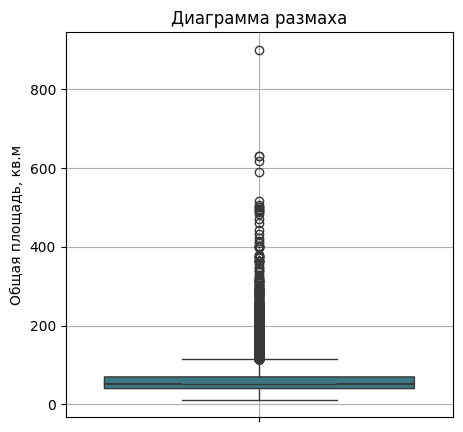

In [39]:
plt.figure(figsize=figsize())
sns.boxplot(data['total_area'],notch=True, color=new_color())
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв.м')
plt.grid(True)
None

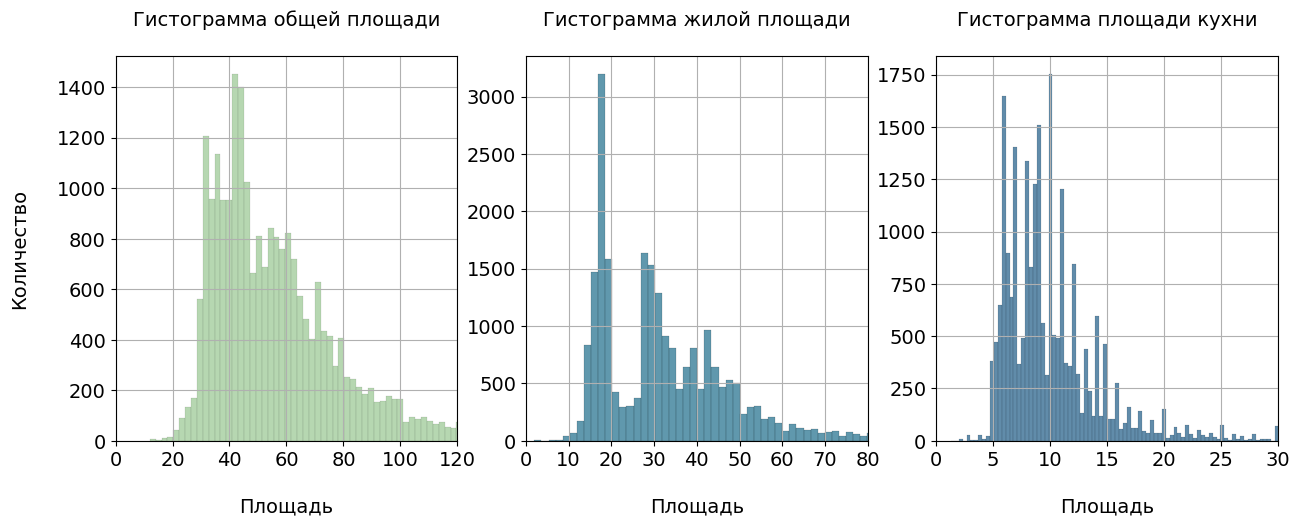

In [40]:
plt.figure(figsize=figsize(3))
plt.subplot(1,3,1)
ax_1 = sns.histplot(data['total_area'],color=new_color(),alpha=alpha)
plt.xlim(0,120)
plot_set(ax_1,title='Гистограмма общей площади', xlabel='Площадь',ylabel='Количество',xrot=False, fontsize=14)
plt.subplot(1,3,2)
ax_2 = sns.histplot(data['living_area'],color=new_color(),alpha=alpha)
plt.xlim(0,80)
plot_set(ax_1,title='Гистограмма жилой площади', xlabel='Площадь',xrot=False, fontsize=14)
plt.subplot(1,3,3)
ax_3 = sns.histplot(data['kitchen_area'],color=new_color(),alpha=alpha)
plt.xlim(0,30)
plot_set(ax_1,title='Гистограмма площади кухни', xlabel='Площадь',xrot=False, fontsize=14)
None

Распределение по общей площади похоже на Пуассоновское. Для жилой площади и площади кухни видны дополнительные пики. Скорее всего связаны с добавлением медиан.

### Число комнат

In [41]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [42]:
data['rooms'].describe()['75%'] + 1.5 *(data['rooms'].describe()['75%'] - data['rooms'].describe()['25%'])

6.0

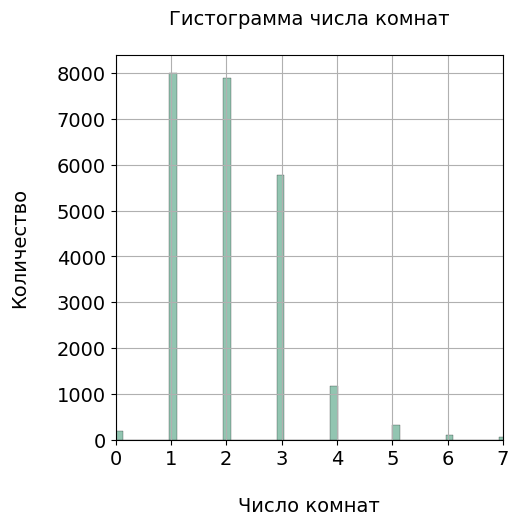

In [43]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['rooms'],color=new_color(),alpha=alpha)
plt.xlim(0,7)
plot_set(ax,title='Гистограмма числа комнат', xlabel='Число комнат',ylabel='Количество',xrot=False, fontsize=14)
None

Больше всего 1 и 2 комнатных квартир. Немного меньше трёхкомнатных. Остальных замето меньше.

### Высота потолков.

In [44]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.705092
std          0.218901
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

In [45]:
data['ceiling_height'].describe()['75%'] + 1.5 *(data['ceiling_height'].describe()['75%'] - data['ceiling_height'].describe()['25%'])

3.0500000000000003

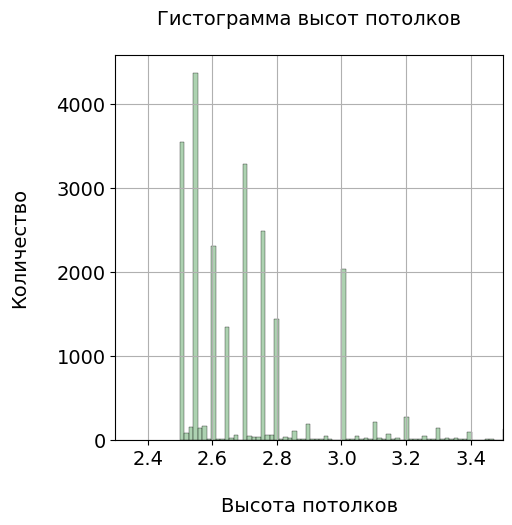

In [46]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['ceiling_height'],color=new_color(),alpha=alpha)
plt.xlim(2.3,3.5)
plot_set(ax,title='Гистограмма высот потолков', xlabel='Высота потолков',ylabel='Количество',xrot=False, fontsize=14)

Высота потолков распределена неравномерно. Пики около 2.5 и 2.7 метров, что объясняется рекомендациями по высоте потолков

### Этажи

#### Этажность домов.

In [47]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [48]:
data['floors_total'].describe()['75%'] + 1.5 *(data['floors_total'].describe()['75%'] - data['ceiling_height'].describe()['25%'])

36.175

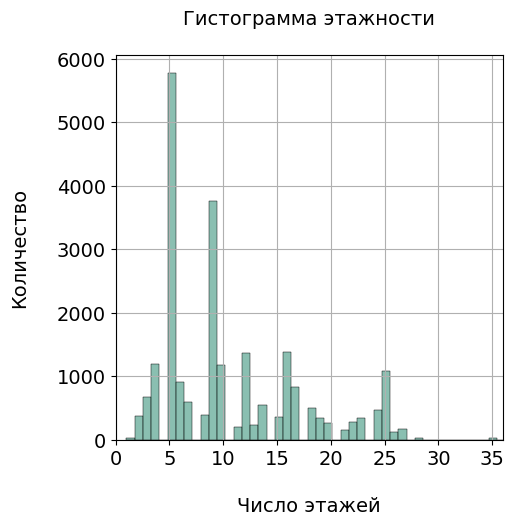

In [49]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['floors_total'],color=new_color(),alpha=alpha)
plt.xlim(0,36)
plot_set(ax,title='Гистограмма этажности', xlabel='Число этажей',ylabel='Количество',xrot=False, fontsize=14)

Максимумы на 5, 9, 12, 16 и 26 этажах.

#### Тип этажей.

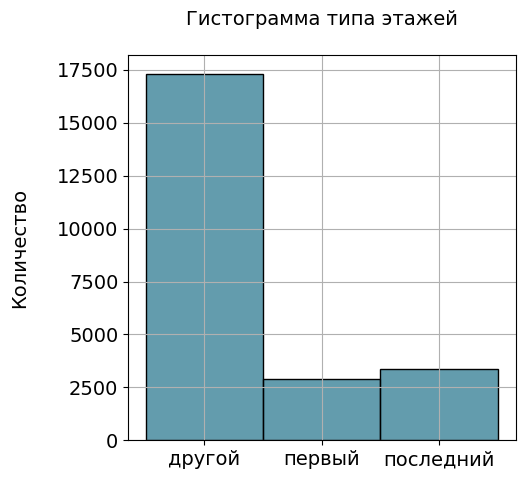

In [50]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['floor_category'],color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма типа этажей',ylabel='Количество',xrot=False, fontsize=14)
None

### От центра до аэропорта

#### Удалённость от центра

In [51]:
data.loc[data['locality_name']=='Санкт-Петербург','city_centers_nearest_km'].describe()

count    15591.000000
mean        11.090950
std          4.832904
min          0.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

In [52]:
data.loc[data['locality_name']=='Санкт-Петербург','city_centers_nearest_km'].describe()['75%'] + 1.5 *(data.loc[data['locality_name']=='Санкт-Петербург','city_centers_nearest_km'].describe()['75%'] - data.loc[data['locality_name']=='Санкт-Петербург','city_centers_nearest_km'].describe()['25%'])

23.0

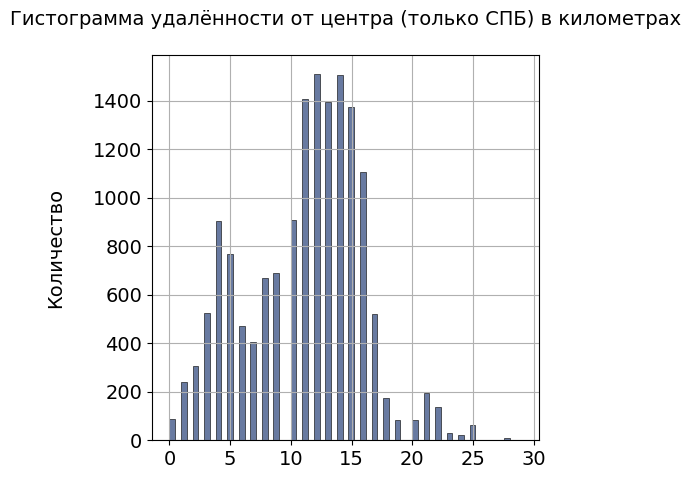

In [53]:
plt.figure(figsize=figsize())
ax = sns.histplot(data.loc[data['locality_name']=='Санкт-Петербург','city_centers_nearest_km'],color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма удалённости от центра (только СПБ) в километрах',ylabel='Количество',xrot=False, fontsize=14)
None

Медиана 12 километров. Есть и самый центр.

#### Удалённость от аэропорта

In [54]:
data.loc[data['locality_name']=='Санкт-Петербург','airports_nearest'].describe()

count    15567.000000
mean     28040.281621
std      11548.999483
min          0.000000
25%      18575.500000
50%      26763.000000
75%      36587.000000
max      54784.000000
Name: airports_nearest, dtype: float64

In [55]:
data.loc[data['locality_name']=='Санкт-Петербург','airports_nearest'].describe()['75%'] + 1.5 *(data.loc[data['locality_name']=='Санкт-Петербург','airports_nearest'].describe()['75%'] - data.loc[data['locality_name']=='Санкт-Петербург','airports_nearest'].describe()['25%'])

63604.25

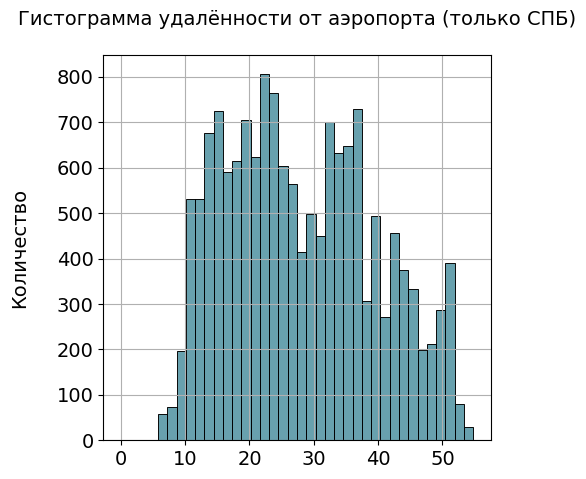

In [56]:
plt.figure(figsize=figsize())
ax = sns.histplot(data.loc[data['locality_name']=='Санкт-Петербург','airports_nearest']/1000,color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма удалённости от аэропорта (только СПБ)',ylabel='Количество',xrot=False, fontsize=14)

### День, месяц, год

#### День публикации

In [57]:
data['weekday'].describe()

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

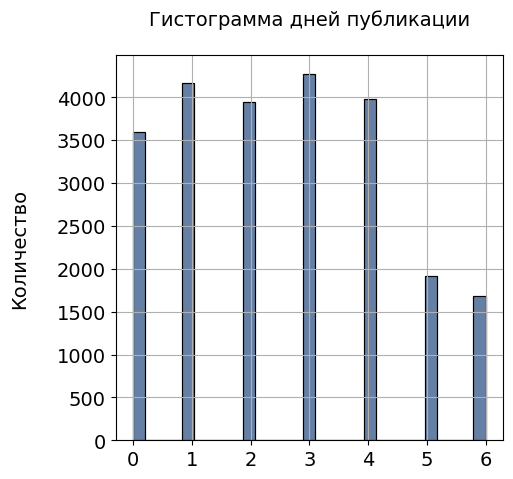

In [58]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['weekday'],color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма дней публикации',ylabel='Количество',xrot=False, fontsize=14)

Достаточно равномерно по будням. В выходные отдых.

#### Месяц публикации

In [59]:
data['month'].describe()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

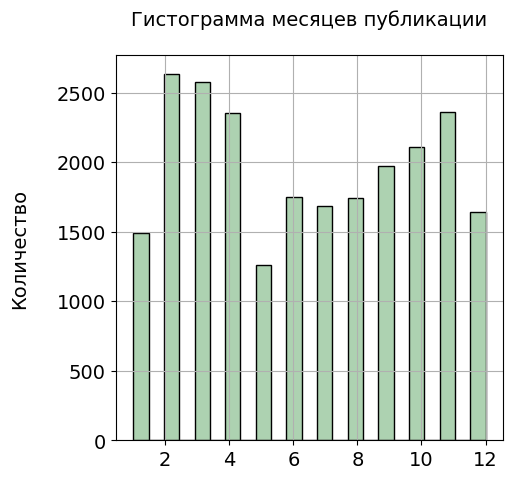

In [60]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['month'],color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма месяцев публикации',ylabel='Количество',xrot=False, fontsize=14)

Февраль, март, апрель и ноябрь. Интересное распределение

#### Год публикации

In [61]:
data['year'].describe()

count    23565.000000
mean      2017.371016
std          1.037393
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

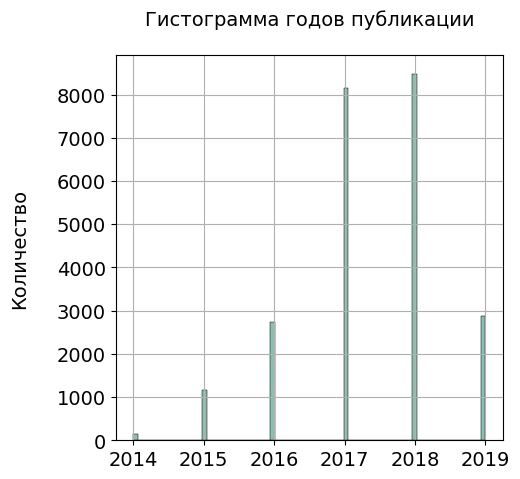

In [62]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['year'],color=new_color(),alpha=alpha)
plot_set(ax,title='Гистограмма годов публикации',ylabel='Количество',xrot=False, fontsize=14)

Данные собирались в 2019 году, их мало. До 2017 года тоже. 

### Parks & Ponds

#### Ближайшие парки и водоёмы

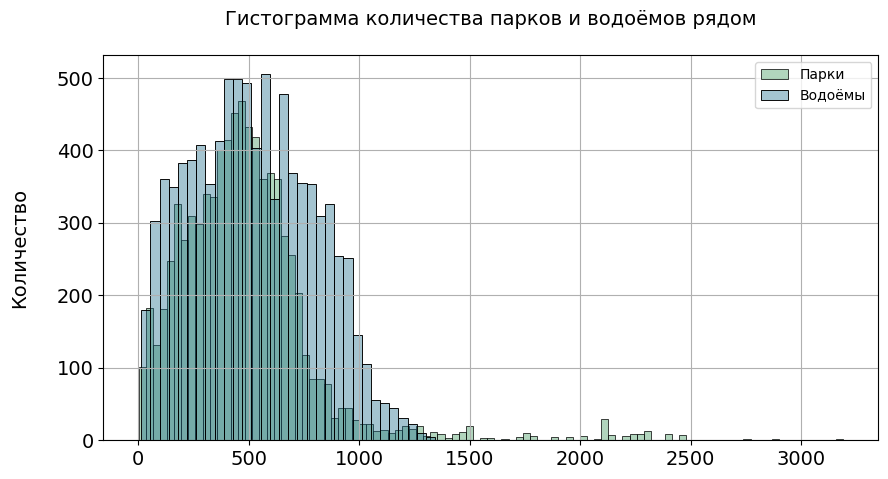

In [63]:
plt.figure(figsize=figsize(2))
ax = sns.histplot(data['parks_nearest'],color=new_color(2),alpha=0.6)
sns.histplot(data['ponds_nearest'],color=new_color(13),alpha=0.4,ax = ax)
plt.legend(['Парки','Водоёмы'])
plot_set(ax,title='Гистограмма количества парков и водоёмов рядом',ylabel='Количество',xrot=False, fontsize=14)

Похоже на распределение Пуассона

#### Количества парков и водоёмов рядом

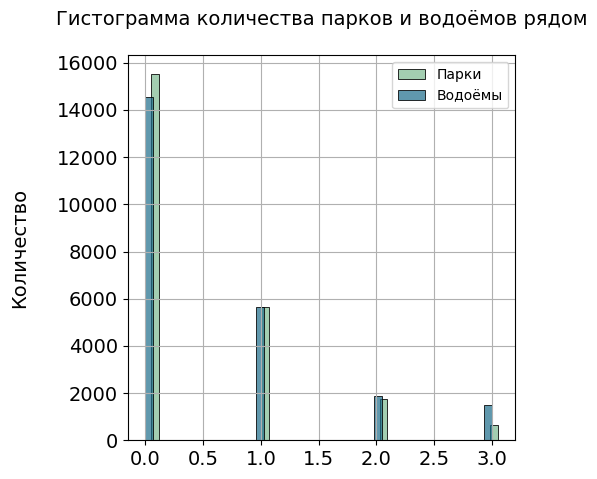

In [64]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['parks_around3000']+0.05,color=new_color(2),alpha=alpha)
sns.histplot(data['ponds_around3000'],color=new_color(13),alpha=alpha,ax = ax)
plt.legend(['Парки','Водоёмы'])
plot_set(ax,title='Гистограмма количества парков и водоёмов рядом',ylabel='Количество',xrot=False, fontsize=14)

Чаще всего, парков и водоёмов нет.

### Время продажи

In [65]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [66]:
data['days_exposition'].describe()['25%'] - 1.5 *(data['days_exposition'].describe()['75%'] - data['days_exposition'].describe()['25%'])

-234.0

In [67]:
data['days_exposition'].describe()['75%'] + 1.5 *(data['days_exposition'].describe()['75%'] - data['days_exposition'].describe()['25%'])

510.0

Всё что больше 1.5 лет - аномалия. Медиана - около 3х месяцев

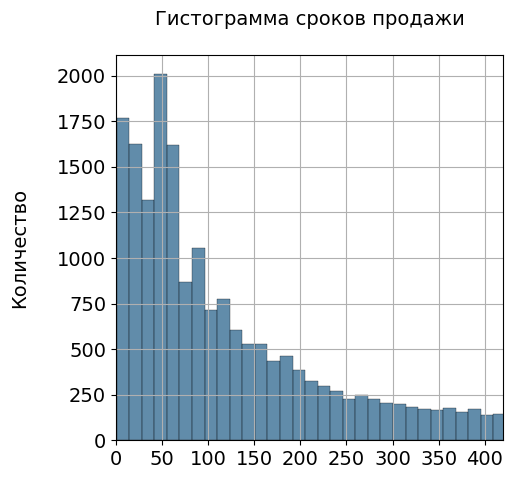

In [68]:
plt.figure(figsize=figsize())
ax = sns.histplot(data['days_exposition'],color=new_color(),alpha=alpha)
plt.xlim(0,420)
plot_set(ax,title='Гистограмма сроков продажи',ylabel='Количество',xrot=False, fontsize=14)

Есть пиковые значения. Около 1.5, 2, 3 месяцев. Возможно, спустя определённый срок публикация обновляется.

#### Динамика сроков

<Figure size 500x500 with 0 Axes>

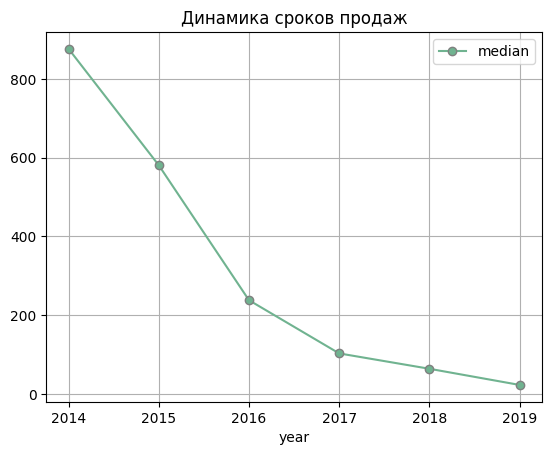

In [69]:
plt.figure(figsize=figsize())
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'days_exposition', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
ax = pivot_table_year_exposition.plot(y = 'median', style ='-o',grid=True,color=new_color(),mec=mec)
plt.title('Динамика сроков продаж')
None

Сроки продажи существенно снизились. Большой спрос.

### Данные о цене

#### 2014 год

In [70]:
data.loc[data['year'] == 2014, 'last_price'].describe()

count    1.360000e+02
mean     1.204660e+07
std      1.255694e+07
min      1.200000e+06
25%      4.416238e+06
50%      7.640000e+06
75%      1.448875e+07
max      7.933900e+07
Name: last_price, dtype: float64

In [71]:
data.loc[data['year'] == 2014, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2014, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2014, 'last_price'].describe()['25%'])

29597518.75

In [72]:
data.loc[data['year'] == 2014, 'price_per_area'].describe()

count       136.000000
mean     124302.355882
std       70670.939616
min       20338.980000
25%       81703.470000
50%      106901.900000
75%      144282.725000
max      502425.020000
Name: price_per_area, dtype: float64

In [73]:
data.loc[data['year'] == 2014, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2014, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2014, 'price_per_area'].describe()['25%'])

238151.60749999993

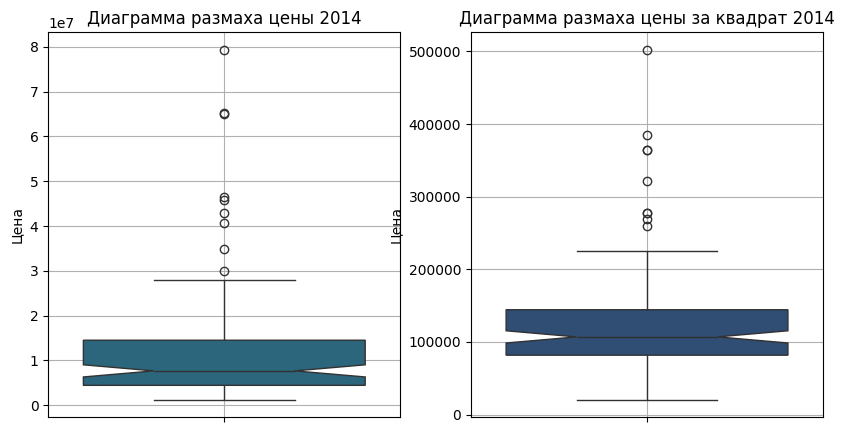

In [74]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2014, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2014')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2014, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2014')
plt.ylabel('Цена')
plt.show()
None

Цены выше 30 миллионов аномальные. Медиана - 7.6 миллиона
Цены выше 240 тысяч за квадрат аномальные. Медиана - 107 тысяч

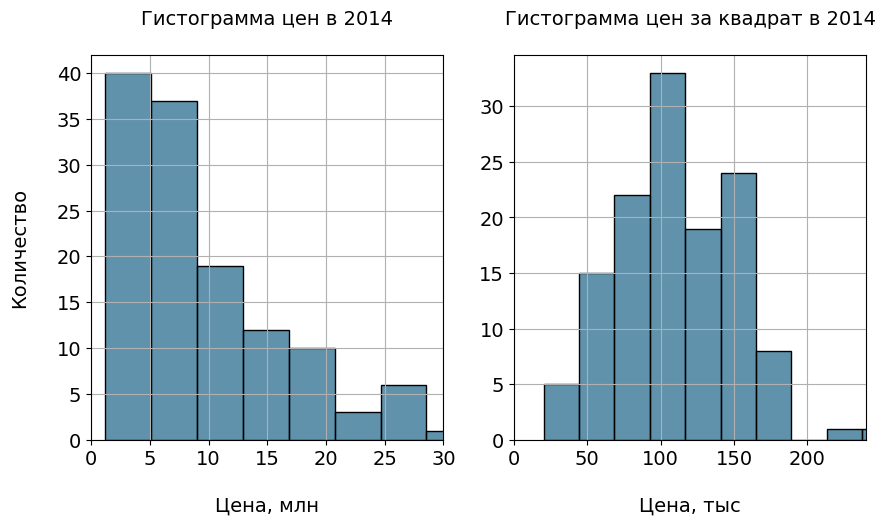

In [75]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2014, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,30)
plot_set(ax,title='Гистограмма цен в 2014',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2014, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,240)
plot_set(ax,title='Гистограмма цен за квадрат в 2014',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### 2015 год

In [76]:
data.loc[data['year'] == 2015, 'last_price'].describe()

count    1.166000e+03
mean     8.595669e+06
std      1.342454e+07
min      6.500000e+05
25%      3.750000e+06
50%      5.300500e+06
75%      8.250000e+06
max      1.800000e+08
Name: last_price, dtype: float64

In [77]:
data.loc[data['year'] == 2015, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2015, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2015, 'last_price'].describe()['25%'])

15000000.0

In [78]:
data.loc[data['year'] == 2015, 'price_per_area'].describe()

count      1166.000000
mean     104640.330051
std       61208.228378
min       12542.370000
25%       77607.132500
50%       93364.780000
75%      115541.565000
max      719298.250000
Name: price_per_area, dtype: float64

In [79]:
data.loc[data['year'] == 2015, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2015, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2015, 'price_per_area'].describe()['25%'])

172443.21375

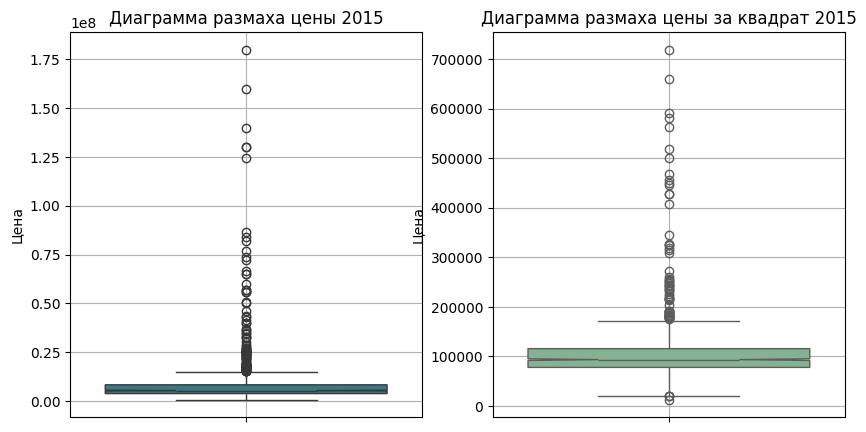

In [80]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2015, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2015')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2015, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2015')
plt.ylabel('Цена')
plt.show()
None

Цены выше 15 миллионов аномальные. Медиана - 5.3 миллиона
Цены выше 173 тысячи за квадрат аномальные. Медиана - 93 тысячи

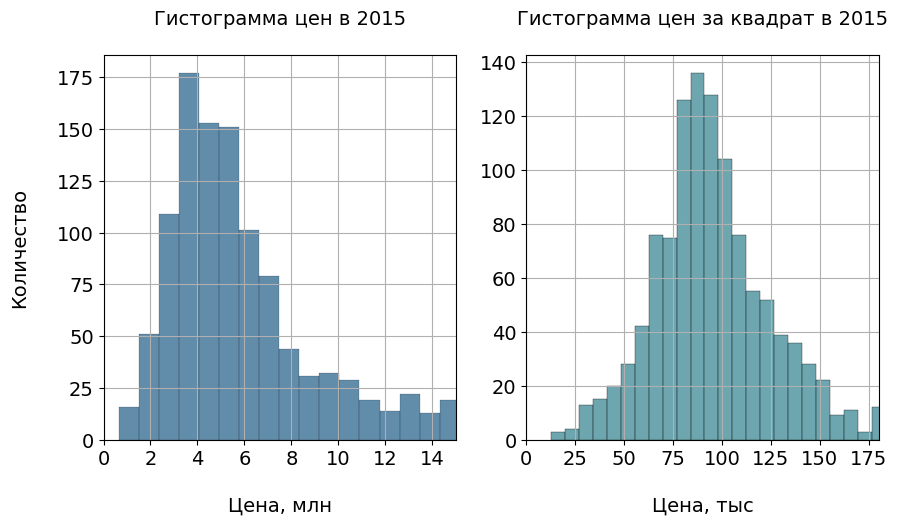

In [81]:

plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2015, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,15)
plot_set(ax,title='Гистограмма цен в 2015',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2015, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,180)
plot_set(ax,title='Гистограмма цен за квадрат в 2015',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### 2016 год

In [82]:
data.loc[data['year'] == 2016, 'last_price'].describe()

count    2.745000e+03
mean     6.829117e+06
std      1.210662e+07
min      4.900000e+05
25%      3.400000e+06
50%      4.530000e+06
75%      6.800000e+06
max      4.013000e+08
Name: last_price, dtype: float64

In [83]:
data.loc[data['year'] == 2016, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2016, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2016, 'last_price'].describe()['25%'])

11900000.0

In [84]:
data.loc[data['year'] == 2016, 'price_per_area'].describe()

count    2.745000e+03
mean     9.829180e+04
std      5.098219e+04
min      1.158730e+04
25%      7.457627e+04
50%      9.174312e+04
75%      1.109259e+05
max      1.000748e+06
Name: price_per_area, dtype: float64

In [85]:
data.loc[data['year'] == 2016, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2016, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2016, 'price_per_area'].describe()['25%'])

165450.41999999998

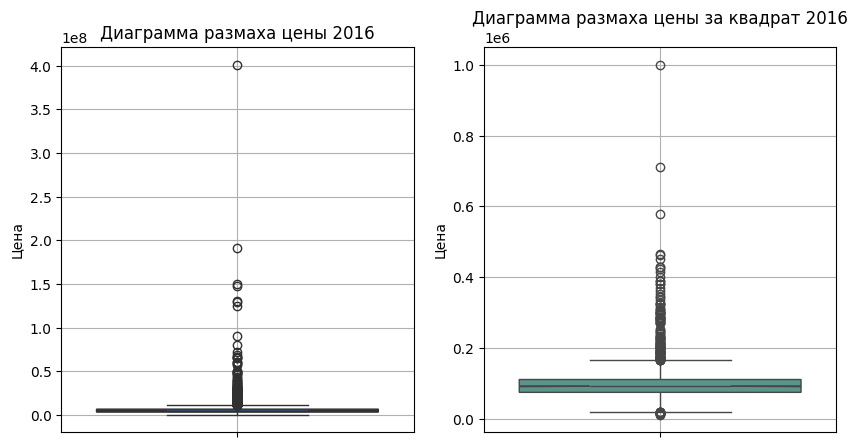

In [86]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2016, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2016')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2016, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2016')
plt.ylabel('Цена')
plt.show()
None

Цены выше 12 миллионов аномальные. Медиана - 4.5 миллиона
Цены выше 165 тысяч за квадрат аномальные. Медиана - 91 тысяча

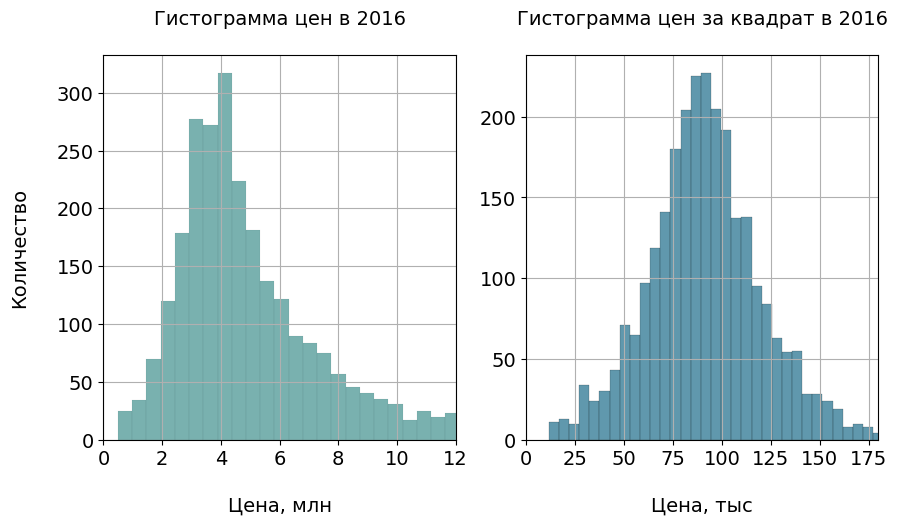

In [87]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2016, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,12)
plot_set(ax,title='Гистограмма цен в 2016',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2016, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,180)
plot_set(ax,title='Гистограмма цен за квадрат в 2016',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### 2017 год

In [88]:
data.loc[data['year'] == 2017, 'last_price'].describe()

count    8.161000e+03
mean     6.582530e+06
std      1.343771e+07
min      4.500000e+05
25%      3.350000e+06
50%      4.500000e+06
75%      6.690000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [89]:
data.loc[data['year'] == 2017, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2017, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2017, 'last_price'].describe()['25%'])

11700000.0

In [90]:
data.loc[data['year'] == 2017, 'price_per_area'].describe()

count    8.161000e+03
mean     9.763812e+04
std      5.063372e+04
min      1.071429e+04
25%      7.555556e+04
50%      9.256966e+04
75%      1.105991e+05
max      1.907500e+06
Name: price_per_area, dtype: float64

In [91]:
data.loc[data['year'] == 2017, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2017, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2017, 'price_per_area'].describe()['25%'])

163164.36000000002

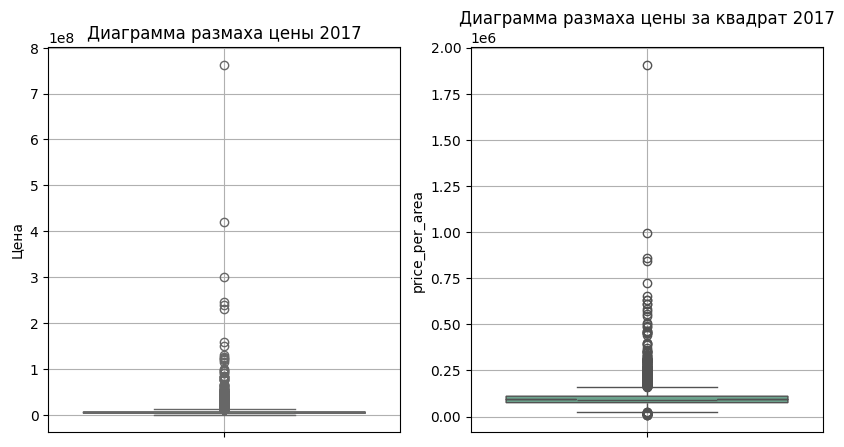

In [92]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2017, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2017')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2017, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2017')
plt.show()
None

Цены выше 12 миллионов аномальные. Медиана - 4.5 миллиона
Цены выше 165 тысяч за квадрат аномальные. Медиана - 92 тысячи

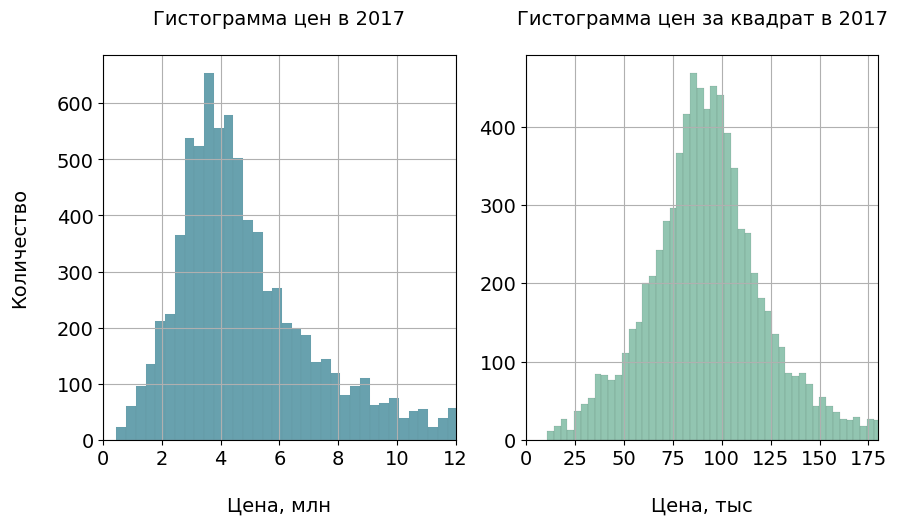

In [93]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2017, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,12)
plot_set(ax,title='Гистограмма цен в 2017',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2017, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,180)
plot_set(ax,title='Гистограмма цен за квадрат в 2017',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### 2018 год

In [94]:
data.loc[data['year'] == 2018, 'last_price'].describe()

count    8.486000e+03
mean     5.954065e+06
std      7.177754e+06
min      4.300000e+05
25%      3.372500e+06
50%      4.550000e+06
75%      6.500000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [95]:
data.loc[data['year'] == 2018, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2018, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2018, 'last_price'].describe()['25%'])

11191250.0

In [96]:
data.loc[data['year'] == 2018, 'price_per_area'].describe()

count    8.486000e+03
mean     9.776271e+04
std      4.474302e+04
min      7.962960e+03
25%      7.614574e+04
50%      9.569635e+04
75%      1.144730e+05
max      1.736842e+06
Name: price_per_area, dtype: float64

In [97]:
data.loc[data['year'] == 2018, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2018, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2018, 'price_per_area'].describe()['25%'])

171963.81125

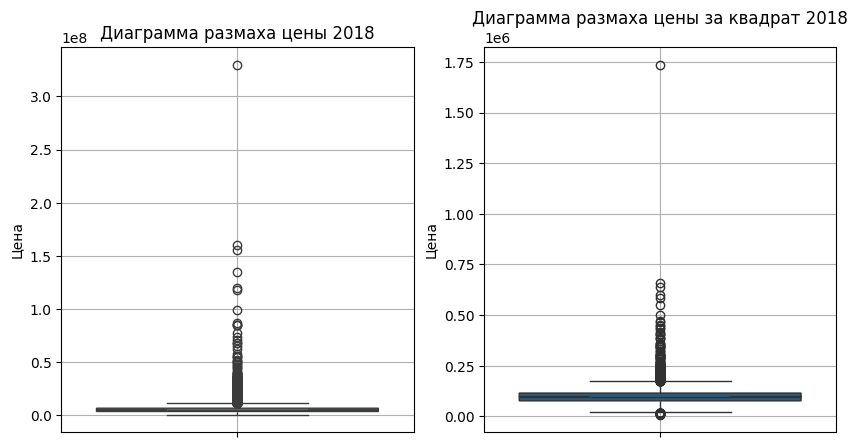

In [98]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2018, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2018')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2018, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2018')
plt.ylabel('Цена')
plt.show()
None

Цены выше 11 миллионов аномальные. Медиана - 4.3 миллиона
Цены выше 171 тысячи за квадрат аномальные. Медиана - 96 тысяч

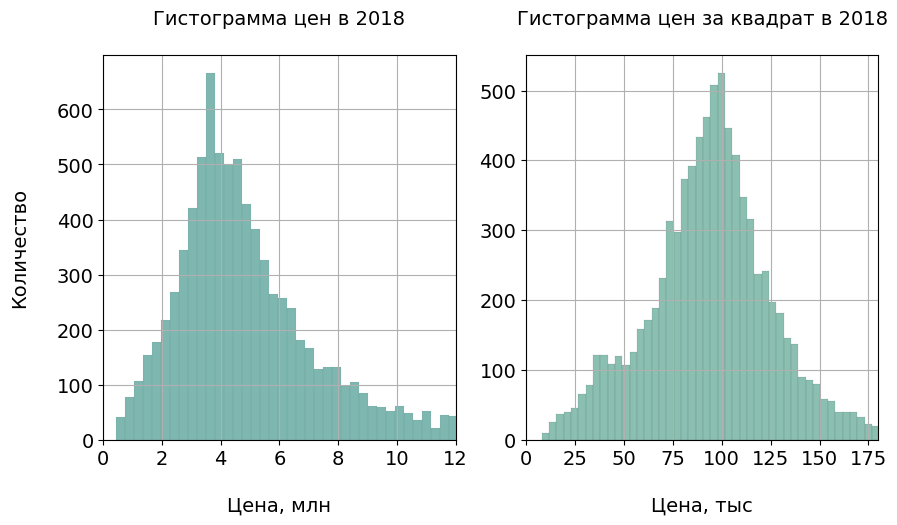

In [99]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2018, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,12)
plot_set(ax,title='Гистограмма цен в 2018',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2018, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,180)
plot_set(ax,title='Гистограмма цен за квадрат в 2018',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### 2019 год

In [100]:
data.loc[data['year'] == 2019, 'last_price'].describe()

count    2.871000e+03
mean     6.779324e+06
std      9.311500e+06
min      1.219000e+04
25%      3.700000e+06
50%      5.050000e+06
75%      7.200000e+06
max      2.892384e+08
Name: last_price, dtype: float64

In [101]:
data.loc[data['year'] == 2019, 'last_price'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2019, 'last_price'].describe()['75%'] - data.loc[data['year'] == 2019, 'last_price'].describe()['25%'])

12450000.0

In [102]:
data.loc[data['year'] == 2019, 'price_per_area'].describe()

count    2.871000e+03
mean     1.070473e+05
std      5.728368e+04
min      1.118300e+02
25%      8.333333e+04
50%      1.031992e+05
75%      1.237634e+05
max      1.542605e+06
Name: price_per_area, dtype: float64

In [103]:
data.loc[data['year'] == 2019, 'price_per_area'].describe()['75%'] + 1.5 *(data.loc[data['year'] == 2019, 'price_per_area'].describe()['75%'] - data.loc[data['year'] == 2019, 'price_per_area'].describe()['25%'])

184408.61750000002

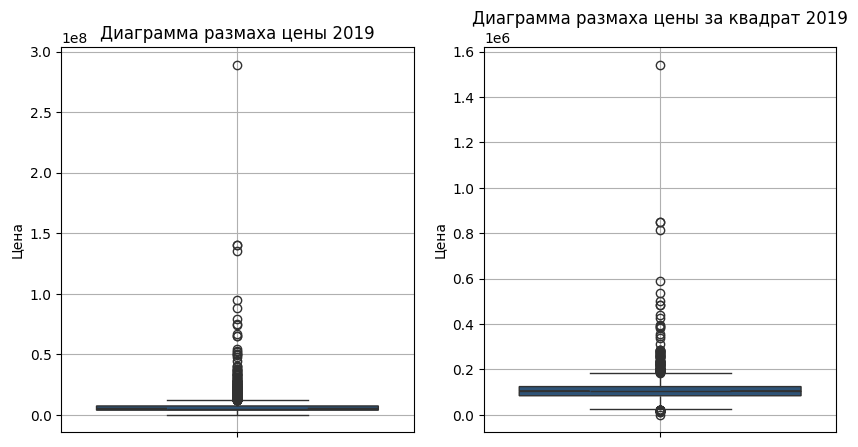

In [104]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.boxplot(data.loc[data['year'] == 2019, 'last_price'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены 2019')
plt.ylabel('Цена')
plt.subplot(1,2,2)
sns.boxplot(data.loc[data['year'] == 2019, 'price_per_area'],notch=True,color=new_color())
plt.grid(True)
plt.title('Диаграмма размаха цены за квадрат 2019')
plt.ylabel('Цена')
plt.show()
None

Цены выше 12 миллионов аномальные. Медиана - 5 миллионов
Цены выше 184 тысяч за квадрат аномальные. Медиана - 103 тысячи

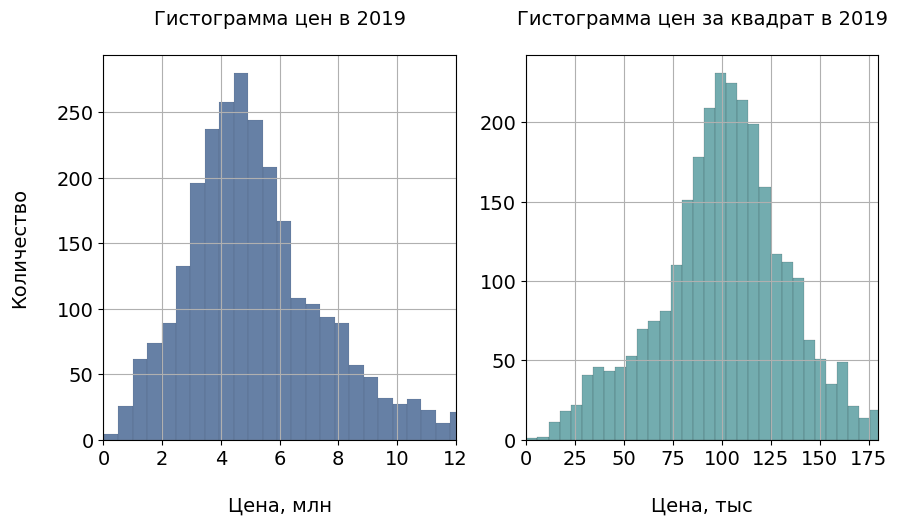

In [105]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax = sns.histplot(data.loc[data['year'] == 2019, 'last_price']/1e6,color=new_color(),alpha=alpha)
plt.xlim(0,12)
plot_set(ax,title='Гистограмма цен в 2019',xlabel='Цена, млн',ylabel='Количество',xrot=False, fontsize=14)

plt.subplot(1,2,2)
ax = sns.histplot(data.loc[data['year'] == 2019, 'price_per_area']/1e3,color=new_color(),alpha=alpha)
plt.xlim(0,180)
plot_set(ax,title='Гистограмма цен за квадрат в 2019',xlabel='Цена, тыс',xrot=False, fontsize=14)

Распределение напоминает пуассоновское

#### Изменение цены

<Figure size 500x500 with 0 Axes>

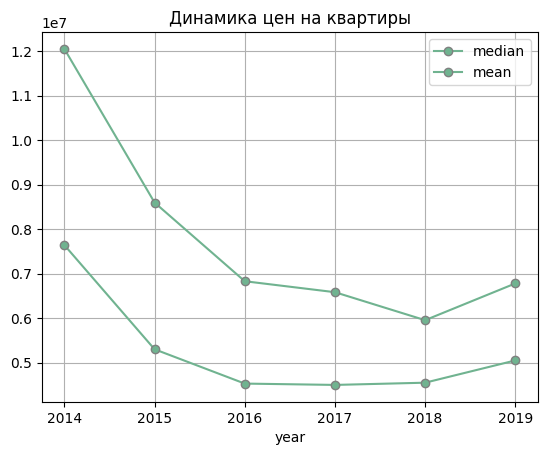

In [106]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
plt.figure(figsize=figsize())
ax = pivot_table_year_exposition.plot(y = 'median', style ='-o',color=new_color(),grid=True, mec=mec)
pivot_table_year_exposition.plot(y = 'mean', style ='-o',ax=ax,color=new_color(),grid=True, mec=mec)
plt.title('Динамика цен на квартиры')
None

<Figure size 500x500 with 0 Axes>

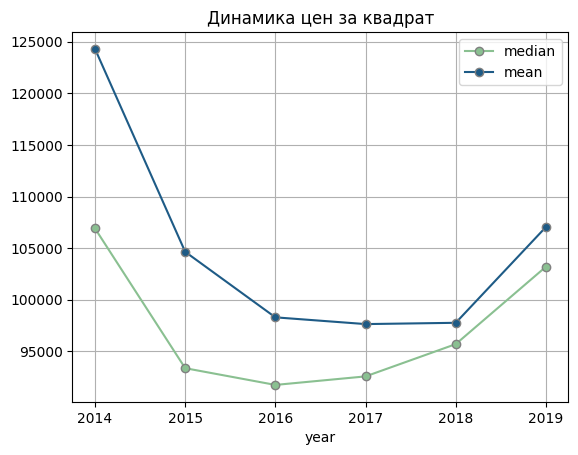

In [107]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'price_per_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
plt.figure(figsize=figsize())
ax = pivot_table_year_exposition.plot(y = 'median', style ='-o',color=new_color(),grid=True, mec=mec)
pivot_table_year_exposition.plot(y = 'mean', style ='-o',ax=ax,color=new_color(),grid=True, mec=mec)
plt.title('Динамика цен за квадрат')
None

### Вывод этапа

- изучены и описаны следующие параметры:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления
- построены гистограммы для каждого параметра
- определены медианные и аномальные значения

## Зависимости и корреляции

В данном разделе будут изучаться зависимости цены за квадратный метр от различных параметров. А именно от:
- [x] площади:
    - общей
    - жилой
    - кухни
- [x] числа комнат
- [x] числа балконов
- [x] высоты потолков
- [x] этажности
- [x] типа этажа
- [x] даты публикации

### Зависимость цены за квадратный метр от числа комнат и балконов

In [108]:
pivot_rooms = data[(data['rooms'] <= 6)].pivot_table(index='rooms',values=['price_per_area','last_price'],aggfunc='median')
pivot_rooms

,last_price,price_per_area
rooms,,
0,2700000.0,105326.800
1,3600000.0,100000.000
2,4768714.0,92807.420
3,6200000.0,88970.590
4,9000000.0,92540.215
5,14000000.0,96551.720
6,19000000.0,99391.205


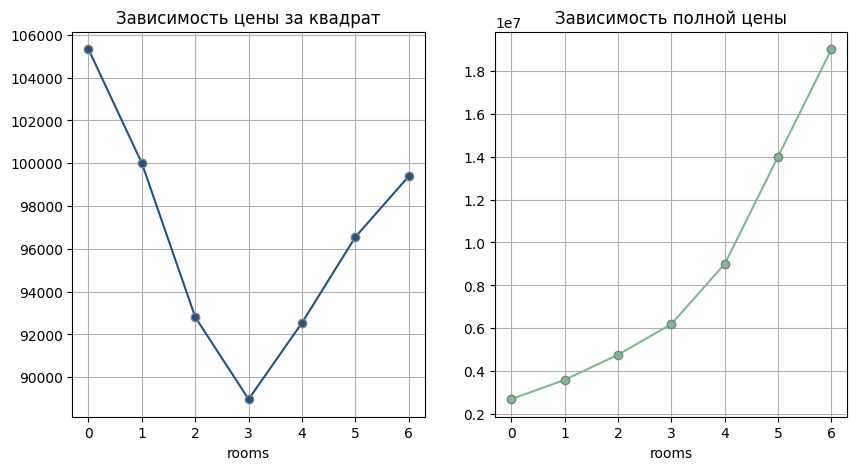

In [109]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_rooms['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_rooms['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

Самые выгодные - трёхкомнатые. Но чем больше комнат, тем выше цена Число комнат больше 6 исключили из рассмотрения - их мало.

In [110]:
data['price_per_area'].corr(data['rooms'])

0.0556799439360988

In [111]:
data['last_price'].corr(data['rooms'])

0.36319054850657456

In [112]:
pivot_balcony = data[(data['year'] > 2014)].pivot_table(index='balcony',values=['price_per_area','last_price'],aggfunc='median')
pivot_balcony

,last_price,price_per_area
balcony,,
0,4600000.0,94327.04
1,4390000.0,93750.00
2,4700000.0,97560.98
3,6500000.0,95555.56
4,6990000.0,105367.92
5,6800000.0,97496.52


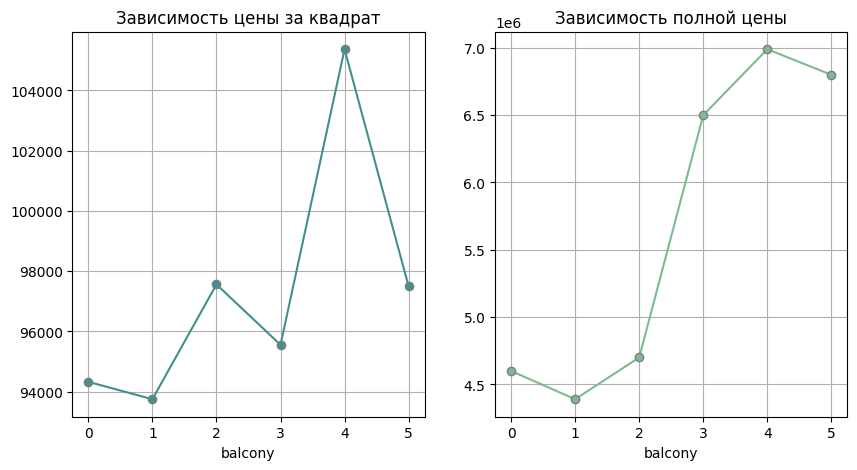

In [113]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_balcony['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_balcony['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

Четыре из пяти не любят пять балконов. А четыре любят все. Цены на квартиры с 3-5 балконами выше. Но вряд ли однакомнатная с пятью балконами - предел мечтаний.

In [114]:
data['price_per_area'].corr(data['balcony'])

0.02349985993761365

In [115]:
data['last_price'].corr(data['balcony'])

0.008568498335887421

Какой либо строгой зависимости не наблюдается.

### Зависимость от площади

In [116]:
pivot_total_area = data[data['total_area']<=115].pivot_table(index='total_area',values=['price_per_area','last_price'],aggfunc='median')
pivot_total_area

,last_price,price_per_area
total_area,,
12.00,2400000.0,200000.000
13.00,1850000.0,142307.690
13.20,1686000.0,127727.270
14.00,1190000.0,85000.000
15.00,1725000.0,115000.000
...,...,...
114.50,5650000.0,49344.980
114.55,28114000.0,245429.940
114.60,12672000.0,110575.920


In [117]:
pivot_living_area = data[data['living_area']<=78].pivot_table(index='living_area',values=['price_per_area','last_price'],aggfunc='median')
pivot_living_area

,last_price,price_per_area
living_area,,
2.00,4340000.0,111709.865
3.00,34715000.0,287923.320
5.00,2680000.0,121818.180
5.40,6100000.0,78608.250
6.00,3799000.0,122548.390
...,...,...
77.60,10595000.0,74394.980
77.61,15373187.0,115241.280
77.71,17807836.0,131326.220


In [118]:
pivot_kitchen_area = data[data['kitchen_area']<=20].pivot_table(index='kitchen_area',values=['price_per_area','last_price'],aggfunc='median')
pivot_kitchen_area

,last_price,price_per_area
kitchen_area,,
1.30,4250000.0,149122.810
2.00,2720000.0,105836.580
2.30,2940000.0,84726.220
2.40,2200000.0,119565.220
2.70,1875000.0,119218.025
...,...,...
19.80,13499000.0,115257.960
19.90,8000000.0,126237.620
19.92,11900000.0,195595.000


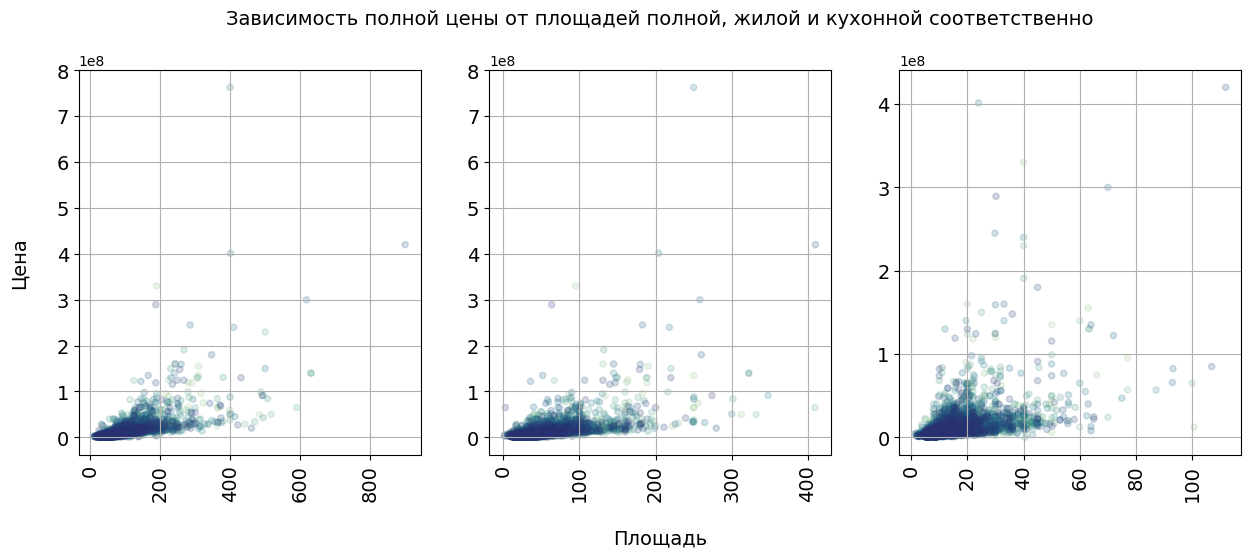

In [119]:
plt.figure(figsize=figsize(3))
ax1 = plt.subplot(1,3,1)
data.plot(ax=ax1,x='total_area',y='last_price',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax1,ylabel='Цена')
ax2 = plt.subplot(1,3,2)
data.plot(ax=ax2,x='living_area',y='last_price',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax,title='Зависимость полной цены от площадей полной, жилой и кухонной соответственно',xlabel='Площадь')
ax3 = plt.subplot(1,3,3)
data.plot(ax=ax3,x='kitchen_area',y='last_price',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax3)

In [120]:
data['last_price'].corr(data['total_area'])

0.6536213939252805

In [121]:
data['last_price'].corr(data['living_area'])

0.5739596367290056

In [122]:
data['last_price'].corr(data['kitchen_area'])

0.5283110089510182

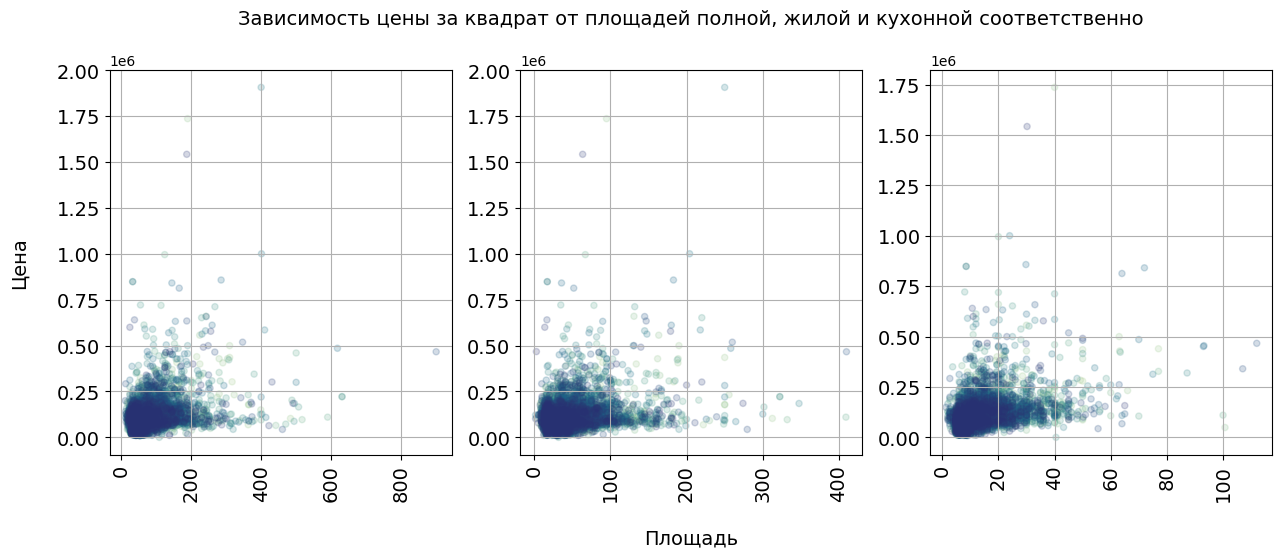

In [123]:
plt.figure(figsize=figsize(3))
ax1 = plt.subplot(1,3,1)
data.plot(ax=ax1,x='total_area',y='price_per_area',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax1,ylabel='Цена')
ax2 = plt.subplot(1,3,2)
data.plot(ax=ax2,x='living_area',y='price_per_area',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax,title='Зависимость цены за квадрат от площадей полной, жилой и кухонной соответственно',xlabel='Площадь')
ax3 = plt.subplot(1,3,3)
data.plot(ax=ax3,x='kitchen_area',y='price_per_area',kind='scatter',color=sns.color_palette(cm, len(data)),alpha=0.2)
plot_set(ax3)

In [124]:
data['price_per_area'].corr(data['total_area'])

0.30257065580111214

In [125]:
data['price_per_area'].corr(data['living_area'])

0.2237047013913485

In [126]:
data['price_per_area'].corr(data['kitchen_area'])

0.3922825465595391

Явной зависимости цены за квадрат не видно . Коэффициенты корреляции говорят о наличии небольшой связи. Больше всего с площадью кухни ($\approx0.4$), чуть меньше для общей площади ($\approx0.3$) и меньше всего для жилой площади ($\approx0.2$). Для полной цены очевидно наибольшая зависимость от общей площади. Но и от жилой и кухонной площади тоже видна зависимость.

### Высота потолков

In [127]:
pivot_ceiling_height = data[data['ceiling_height'] <= 3.05].pivot_table(index='ceiling_height',values=['price_per_area','last_price'],aggfunc='median')
pivot_ceiling_height

,last_price,price_per_area
ceiling_height,,
2.50,3835000.0,86757.990
2.51,4075000.0,97556.275
2.52,3800000.0,82608.700
2.53,4100000.0,85828.340
2.54,4100000.0,92619.050
2.55,3800000.0,83225.810
2.56,3900000.0,87500.000
2.57,4500000.0,90109.890
2.58,4200000.0,85810.810


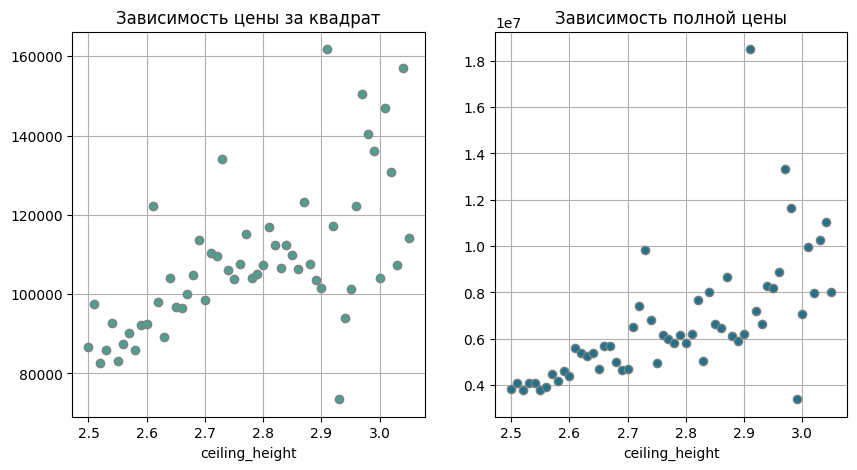

In [128]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_ceiling_height['price_per_area'].plot(grid=True,style='o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_ceiling_height['last_price'].plot(grid=True,style='o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

In [129]:
data['price_per_area'].corr(data['ceiling_height'])

0.2975703038104282

In [130]:
data['last_price'].corr(data['ceiling_height'])

0.27728882047230147

Какой либо чёткой зависимости не видно. Коэффициент корреляции говорит о небольшой связи ($\approx0.3$)

### Этажи

In [131]:
pivot_floors_total = data[data['floors_total']<36].pivot_table(index='floors_total',values=['price_per_area','last_price'],aggfunc='median')
pivot_floors_total

,last_price,price_per_area
floors_total,,
1.0,2300000.0,37000.000
2.0,2050000.0,45126.350
3.0,3650000.0,73048.780
4.0,5950000.0,93012.420
5.0,3690000.0,81504.700
6.0,7900000.0,103224.810
7.0,7650000.0,111842.110
8.0,7226770.0,122703.080
9.0,4400000.0,89743.590


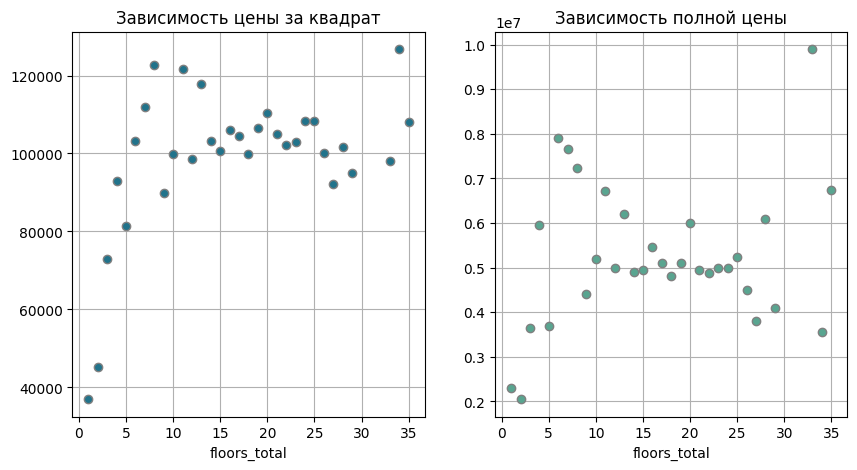

In [132]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_floors_total['price_per_area'].plot(grid=True,style='o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_floors_total['last_price'].plot(grid=True,style='o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

Квартиры в домах в 1-3 этажа более дешёвые.

In [133]:
data['price_per_area'].corr(data['floors_total'])

0.14842329388877143

In [134]:
data['last_price'].corr(data['floors_total'])

-0.0067447039543268635

In [135]:
floor_category = data[data['floors_total']<36].pivot_table(index='floor_category',values=['price_per_area','last_price'],aggfunc='median').sort_values(by='price_per_area')
floor_category

,last_price,price_per_area
floor_category,,
первый,3900000.0,81321.365
последний,4300000.0,87479.940
другой,4848500.0,98279.560


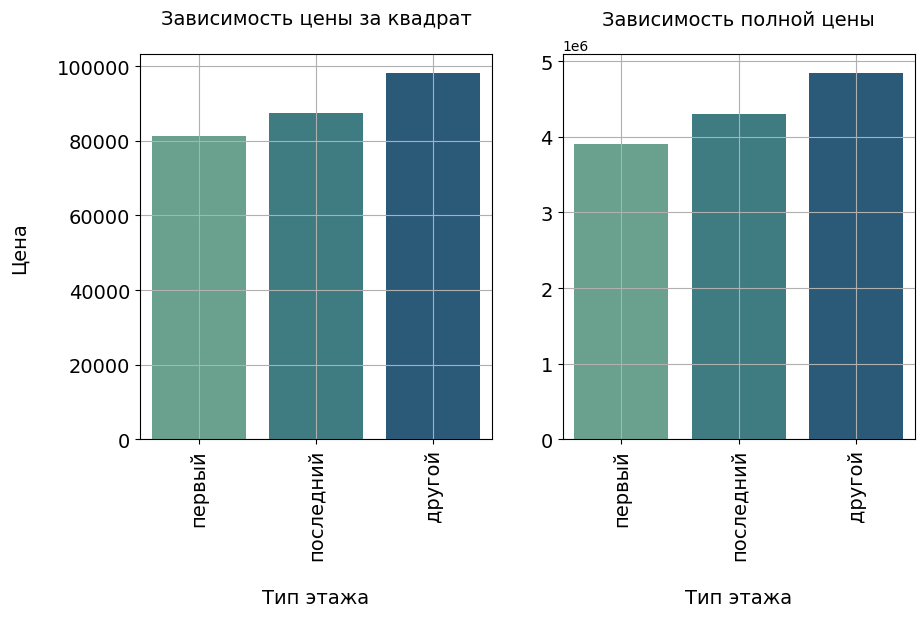

In [152]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
ax=sns.barplot(data=floor_category, x=floor_category.index, y='price_per_area', palette=cm, hue=floor_category.index, legend=False)
plot_set(ax,title='Зависимость цены за квадрат',xlabel='Тип этажа',ylabel='Цена')
plt.subplot(1,2,2)
ax=sns.barplot(data=floor_category, x=floor_category.index, y='last_price', palette=cm, hue=floor_category.index, legend=False)
plot_set(ax,title='Зависимость полной цены',xlabel='Тип этажа')

Цена на первый и последний этажи существенно ниже.

### День, месяц, год

In [137]:
pivot_weekday = data.pivot_table(index='weekday',values=['price_per_area','last_price'],aggfunc='median')
pivot_weekday

,last_price,price_per_area
weekday,,
0,4650000.0,94719.935
1,4720000.0,95567.640
2,4700000.0,95473.810
3,4650000.0,95132.915
4,4550000.0,94579.895
5,4550000.0,93548.390
6,4530000.0,94594.590


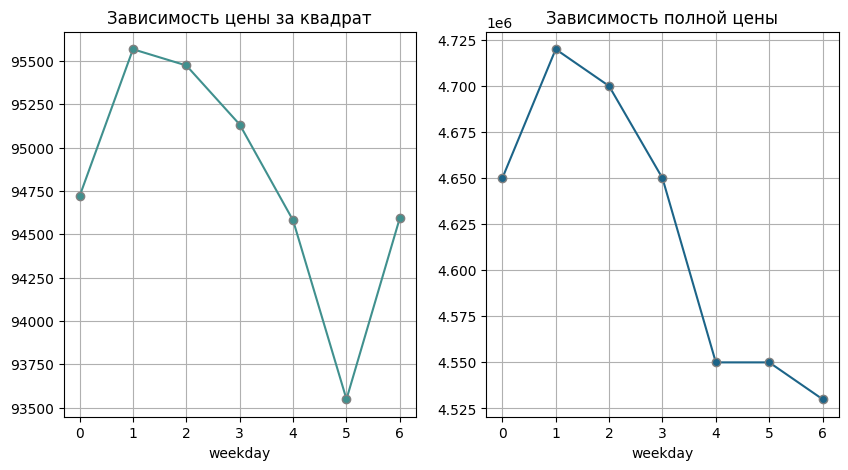

In [138]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_weekday['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_weekday['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

В пятницу и выходные самая низкая цена.

In [139]:
pivot_month = data.pivot_table(index='month',values=['price_per_area','last_price'],aggfunc='median')
pivot_month

,last_price,price_per_area
month,,
1,4600000.0,95180.72
2,4650000.0,95000.00
3,4650000.0,95233.27
4,4800000.0,96543.70
5,4500000.0,92696.63
6,4400000.0,92857.14
7,4650000.0,95005.94
8,4570000.0,96052.63
9,4700000.0,95623.54


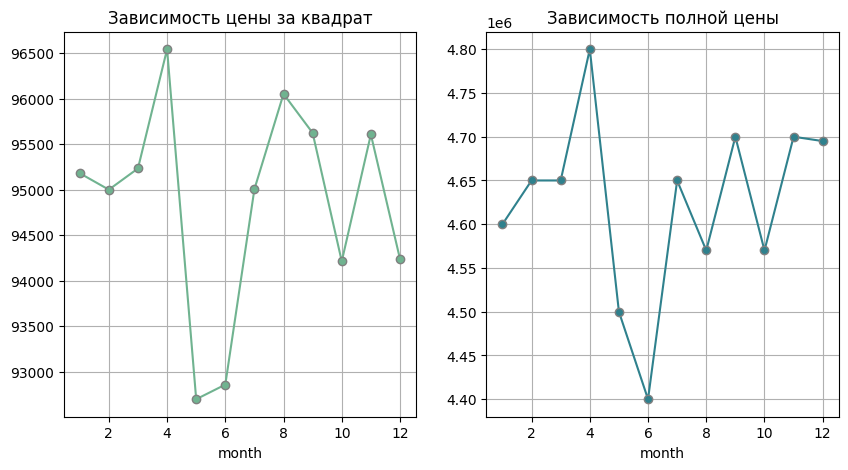

In [140]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_month['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_month['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

Май и июнь не лучшее время для продажи квартир. Но лучшие для покупки

In [141]:
pivot_year = data.pivot_table(index='year',values=['price_per_area','last_price'],aggfunc='median')
pivot_year

,last_price,price_per_area
year,,
2014,7640000.0,106901.90
2015,5300500.0,93364.78
2016,4530000.0,91743.12
2017,4500000.0,92569.66
2018,4550000.0,95696.35
2019,5050000.0,103199.17


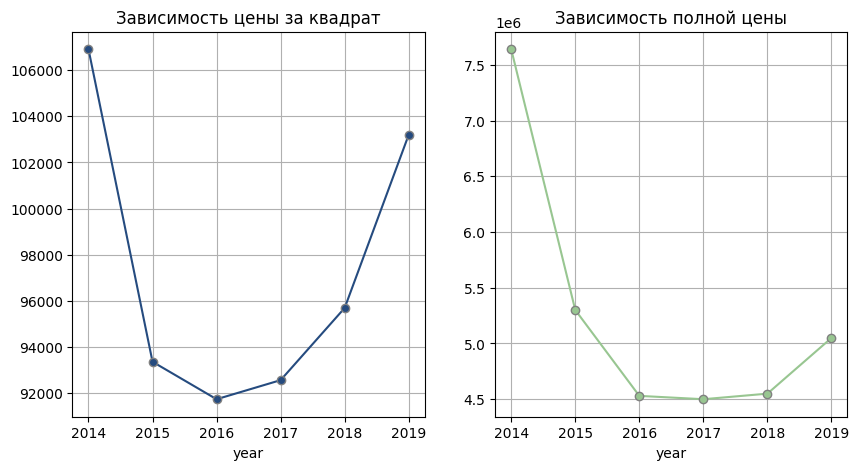

In [142]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
pivot_year['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость цены за квадрат')
plt.subplot(1,2,2)
pivot_year['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.title('Зависимость полной цены')
None

Падает и растёт. А потом растёт и растёт.

### Некоторое обобщение

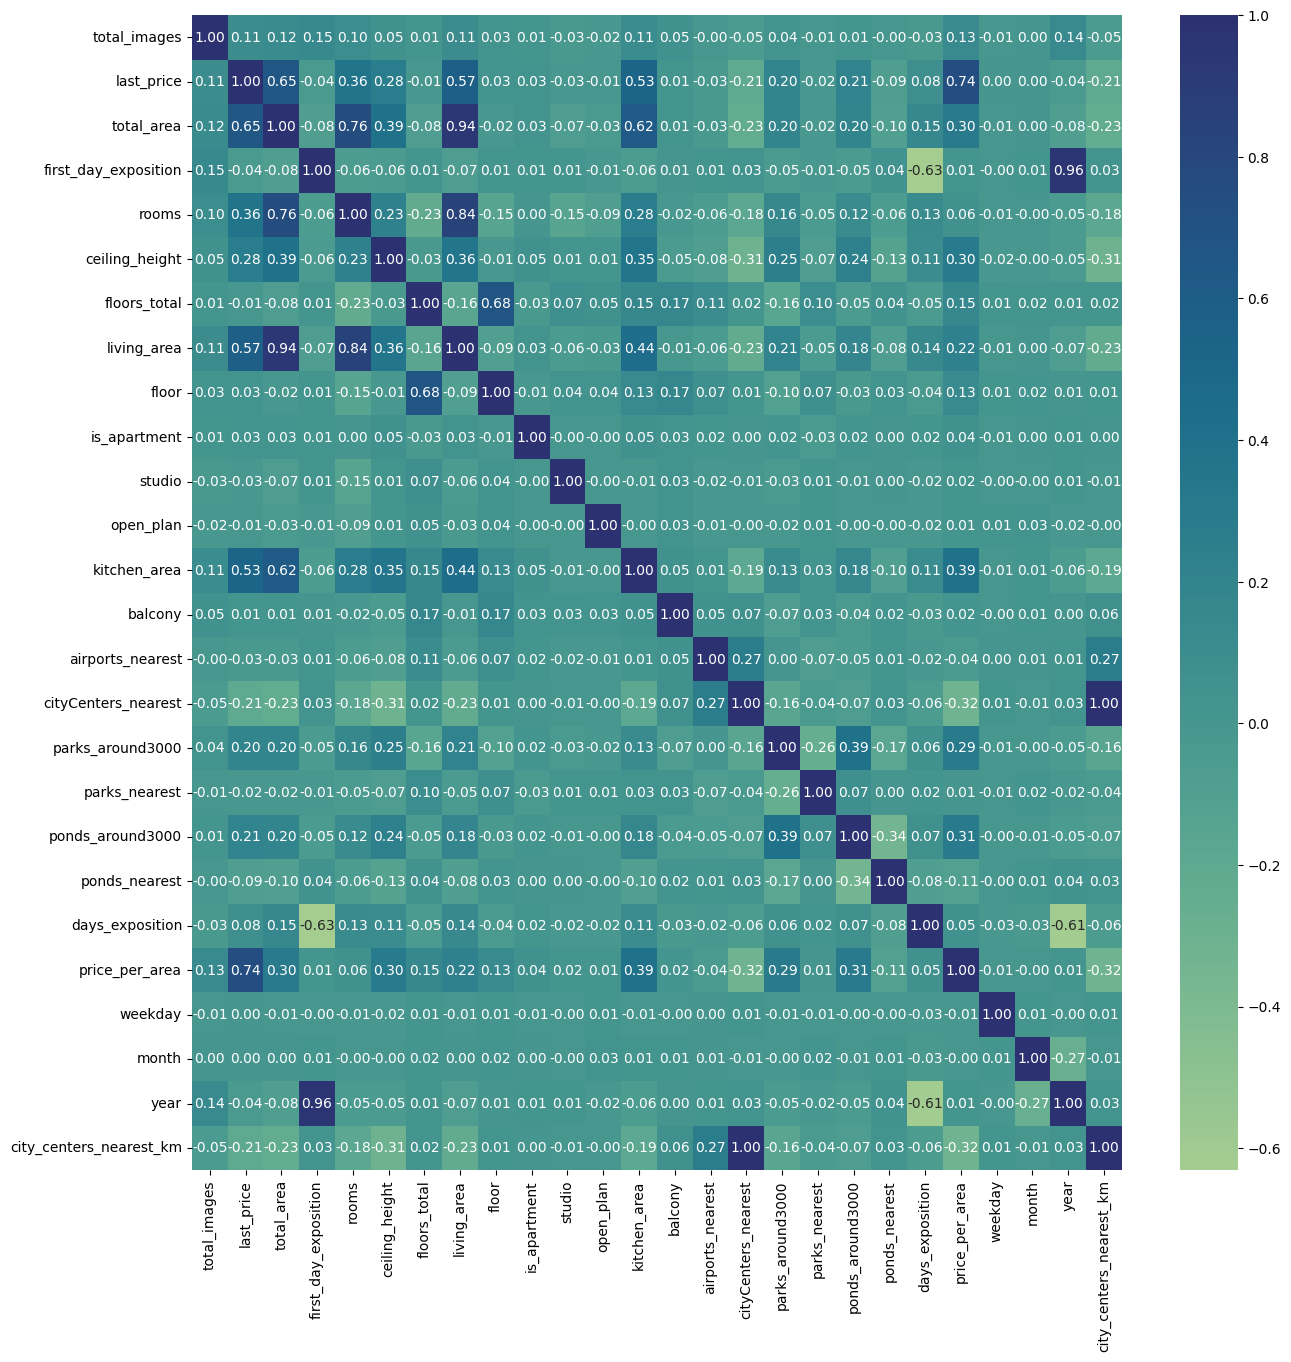

In [143]:
plt.figure(figsize=figsize(3,3))
data_heat = data.drop(['locality_name','floor_category'],axis=1)
sns.heatmap(data_heat.corr(), annot=True, cmap="crest", fmt='.2f')
None

Из данной карты видно, что наибольшая связь цены с площадями (полной, жилой и кухонной), числом комнат, высотой потолков и ценой за квадрат.

### Вывод этапа

Построены зависимости цены за квадратый метр от различных параметров: от площади (общей, жилой, и площади кухни), от высоты потолков, от этажа (этажности дома и типа этажа) и времени публикации объявления (день недели, месяц, год).

Число комнат влияет на цену квадратного метра. Самая оптимальная - трёхкомнатная, остальные дороже. На полную цену, очевидно, тоже: больше комант - выше цена.

Цена за квадрат квартир слабо зависит от общей площади и жилой площади (корреляция 0.3 и 0.2). А с площадью кухни наблюдается чуть большая корреляция (0.4). А вот полная цена зависит очень сильно.

Корреляция с высотой потолков порядка 0.3

Видна явная зависимость от типа этажа: первый и последний этажи существенно дешевле. Цена не зависит от этажности, если дома выше трёх этажей. Квартиры в домах до трёх этажей дешевле.

Наблюдается зависимость от времени публикации. Очевидно, большое влияние года публикации: цены не стоят на месте. В 2014 цены были самые высокие, потом пошёл спад. К 2019 году снова начался рост. Есть и зависимость от месяца: в мае и июне самые низкие цены. Из неочевидного: зависимость от дня недели публикации. Наименьшая цена наблюдается в субботу. Возможно это связано с тем, что на выходные приходится меньше всего объявлений.




## От центра и дальше

### Цены в городах и сёлах

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [144]:
top_local = data.pivot_table(index='locality_name',values='price_per_area',aggfunc=['count','median'])
top_local.columns=['count', 'median']
top_local['median'] = round(top_local['median'],2)
top_local.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15651,104774.54
Мурино,586,86250.38
Кудрово,470,95555.32
Шушары,439,76829.27
Всеволожск,398,65789.47
Пушкин,369,100000.00
Колпино,338,74723.74
Парголово,327,91642.86
Гатчина,307,67796.61


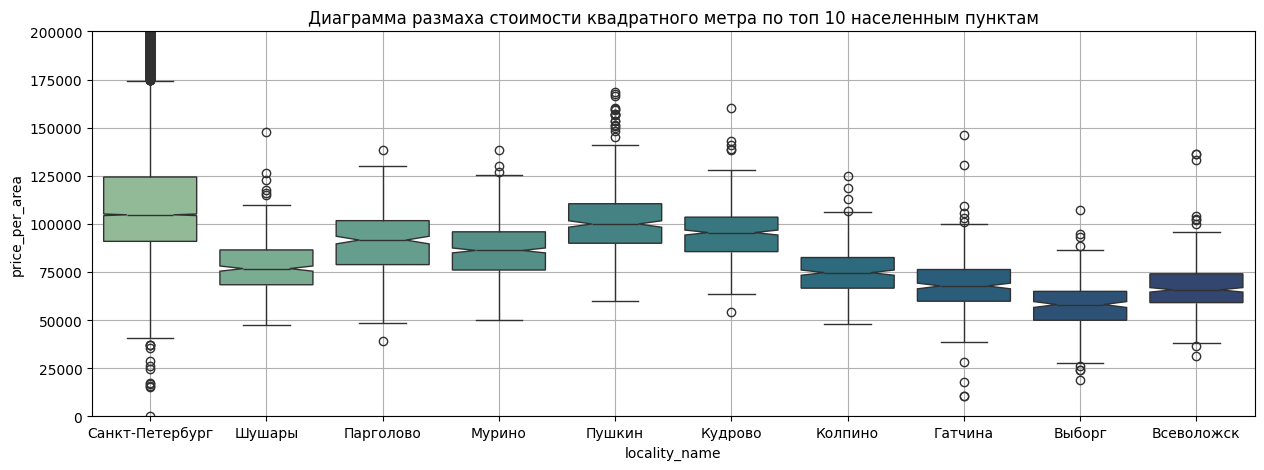

In [145]:
plt.figure(figsize=figsize(3))
sns.boxplot(x='locality_name', y='price_per_area', data=data[data['locality_name'].isin(top_local.sort_values(by='count').tail(10).index)],hue = 'locality_name',notch=True,palette=cm)
plt.grid(True)
plt.ylim(0, 2e5)
plt.title('Диаграмма размаха стоимости квадратного метра по топ 10 населенным пунктам')
None

Aномалии встречаются практически везде. Чаще аномально дорого, чем дёшево.

### Зависимость  цены от удалённости от центра

Рассмотрим зависимость цены за квадрат от расстояния до центра.

In [146]:
data_center = data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='city_centers_nearest_km',values=['price_per_area','last_price'])
data_center

,last_price,price_per_area
city_centers_nearest_km,,
0.0,2.344232e+07,187324.130233
1.0,1.885085e+07,166603.755542
2.0,1.616331e+07,146662.860033
3.0,1.345283e+07,129526.934771
4.0,1.358609e+07,137413.428328
5.0,1.530528e+07,146978.313424
6.0,1.438911e+07,152277.893383
7.0,1.279767e+07,141399.731351
8.0,8.430806e+06,120539.122264


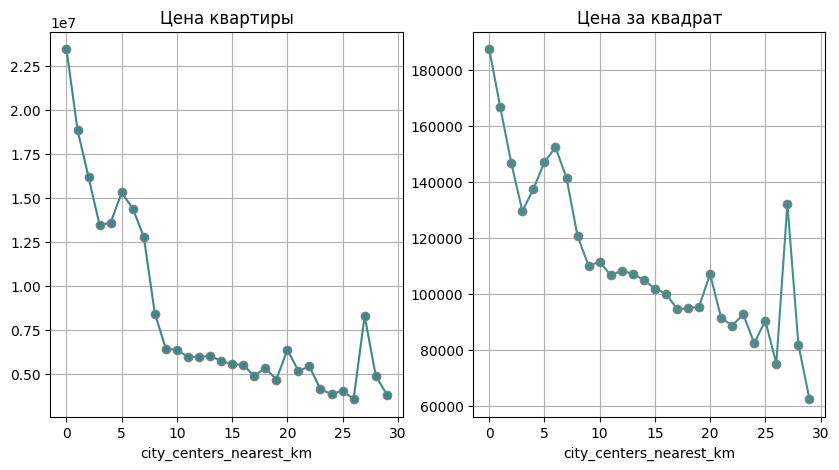

In [147]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
plt.title('Цена квартиры')
data_center['last_price'].plot(grid=True,style='-o',color=new_color(), mec=mec)
plt.subplot(1,2,2)
plt.title('Цена за квадрат')
data_center['price_per_area'].plot(grid=True,style='-o',color=new_color(), mec=mec)
None

In [148]:
data.loc[(data['locality_name']=='Санкт-Петербург'),'city_centers_nearest_km'].corr(data.loc[data['locality_name']=='Санкт-Петербург','price_per_area'])

-0.31257187069151443

Очевидно, наблюдается спад. Коэффициент корреляции -0.3.

### Вывод этапа

Посчитана медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Наибольшая цена в  Санкт-Петербурге и Пушкине, наименьшая в Всеволожске и Выборге.

Определена зависимость цены квартир от удалённости от цента. Как и ожидалось, в центре самые высокие цены. Далее спад. Но появляются некоторые пики. Скорее всего на таком удалении находятся какие то элитные районы с высокими ценами на жильё.

## Общий вывод

Файл содержал данные по 23699 объектам недвижимости, каждый из которых описывался 22 признаками (17 количественных, 4 категориальных и 1 временной). У некоторых признаков были пропущенные значения.

- Обработаны пропуски в столбцах `is_apartment`, `balcony`, `ponds_around3000`, `parks_around3000` заменой на нулевые значения. Пропуски в столбце`days_exposition` заполнены медианными по всему столбцу. Пропуски в `ceiling_height` заполнены медианными высотами квартир той же этажности. Пропуски в `living_area` и `kitchen_area` заполнены медианами жилых и кухонных площадей квартир того же количества комнат и близкой общей площади. Удалось сократить процент пропусков `floors_total`  с 0.36%  на 0%, `ceiling_height`  с 38.8%  на 0%, `locality_name`  с 0.21%  на 0%, `living_area`  с 8.03%  на 0.06%, `kitchen_area`  с 9.16%  на 0.89%, `balcony`  с 48.61%  на 0%, `is_apartment`  с 88.29%  на 0%

- Формат столбцов `last_price`, `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` изменён на `int`, `first_day_exposition` на `datetime`.

- Удалены дубликаты в названии населённых пуктов.

- Обработаны аномальные значения в высотах квартир.

- Удалены строки с пропусками в этажности и названии населённого пункта

- Добавлены новые столбцы
    - цена одного квадратного метра
    - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
    - месяц публикации объявления
    - год публикации объявления
    - тип этажа квартиры (значения — «первый», «последний», «другой»)
    - расстояние в км до центра города
 
- Изучены и описаны следующие параметры:
 
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления
    
- Построены гистограммы для каждого параметра
- Определены медианные и аномальные значения

- Построены зависимости цены за квадратый метр от различных параметров: от площади (общей, жилой, и площади кухни), от высоты потолков, от этажа (этажности дома и типа этажа) и времени публикации объявления (день недели, месяц, год).

    Число комнат влияет на цену квадратного метра. Самая оптимальная - трёхкомнатная (на 7% ниже медианной цены), остальные дороже. На полную цену, очевидно, тоже: больше комант - выше цена (коррелячия 0.36).

    Цена за квадрат квартир слабо зависит от общей площади и жилой площади (корреляция 0.3 и 0.2). А с площадью кухни наблюдается чуть большая корреляция (0.4). А вот полная цена зависит очень сильно.

    Корреляция с высотой потолков порядка 0.3

    Видна явная зависимость от типа этажа: первый и последний этажи существенно дешевле (на 18% и 11% соответственно). Цена не зависит от этажности, если дома выше трёх этажей. Квартиры в домах до трёх этажей дешевле.

    Наблюдается зависимость от времени публикации. Очевидно, большое влияние года публикации: цены не стоят на месте. В 2014 цены были самые высокие, потом пошёл спад. К 2019 году снова начался рост. Есть и зависимость от месяца: в мае и июне самые низкие цены. Из неочевидного: зависимость от дня недели публикации. Наименьшая цена наблюдается в субботу. Возможно это связано с тем, что на выходные приходится меньше всего объявлений.

- Посчитана медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Наибольшая цена в  Санкт-Петербурге и Пушкине, наименьшая в Всеволожске и Выборге.

- Определена зависимость цены квартир от удалённости от цента. Как и ожидалось, в центре самые высокие цены. Далее спад. Но появляются некоторые пики. Скорее всего на таком удалении находятся какие то элитные районы с высокими ценами на жильё.